## **HOTEL REVIEW CLASSIFICATION**

**BUSINESS OBJECTIVE:**

The major objective is what are the attributes that travelers are considering while selecting a hotel. With this manager can understand which elements of their hotel influence more informing a positive review or improves hotel brand image.


In [1]:
#Download pretrained spacy model en_core_web_sm for advanced natural language processing.
!python -m spacy download en_core_web_sm

2022-11-21 04:34:28.964852: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 3.5 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


**IMPORT LIBRARIES**

In [1]:
#Import Required Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import nltk
import spacy
from textblob import TextBlob
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk import pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('tagsets')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-d

**IMPORT DATASET**

In [2]:
#Import Dataset
df=pd.read_excel("hotel_reviews.xlsx")
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


**DATA UNDERSTANDING**

In [3]:
df.shape

(20491, 2)

* Total Observations for the column Review = 20491
* There are two Columns - Review & Rating

In [4]:
df.dtypes

Review    object
Rating     int64
dtype: object

* Review datatype- Object
* Rating datatype- float64

In [5]:
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


* Total Unique Reviews with Ratings = 20491
* Minimum Rating = 1
* Maximum Rating = 5
* On average, user gives Rating 4

In [6]:
df["Rating"].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

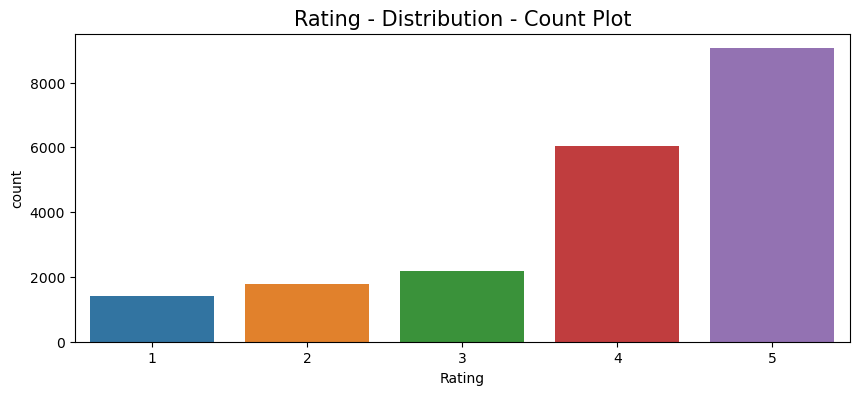

In [7]:
plt.figure(figsize=(10,4))
sns.countplot(x=df.Rating)
plt.title('Rating - Distribution - Count Plot',size=15)
plt.show()


From Count Plot, we can observe that

* More people have given Rating 4 and 5
* Comparitively very less people have given Rating 1,2 and 3
* This shows class Imbalance in the Dataset

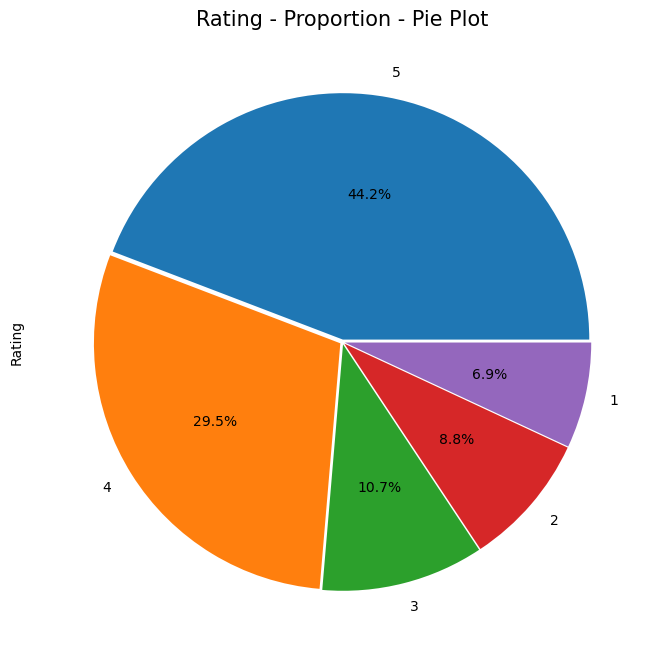

In [8]:
plt.figure(figsize=(8,8))
df.Rating.value_counts().plot(kind='pie',explode=[0.01,0.01,0.01,0.01,0.01],autopct='%.1f%%')
plt.title('Rating - Proportion - Pie Plot',size=15)
plt.show()

From Pie Plot, we can observe that

* 44.2 % of the people have given Rating 5
* 29.5% of the people have given Rating 4
* Only 6.9 % of the people have given Rating 1
* This shows that Ratings are not in same proportion

In [9]:
def rating_analysis(rating):
  if rating==1 or rating ==2:
    return 'Negative'
  elif rating==4 or rating ==5:
    return 'Positive'
  else:
    return 'Neutral'

df['Rating_Analysis']=df['Rating'].apply(lambda x : rating_analysis(x))
df['Rating_Analysis'].value_counts()

Positive    15093
Negative     3214
Neutral      2184
Name: Rating_Analysis, dtype: int64

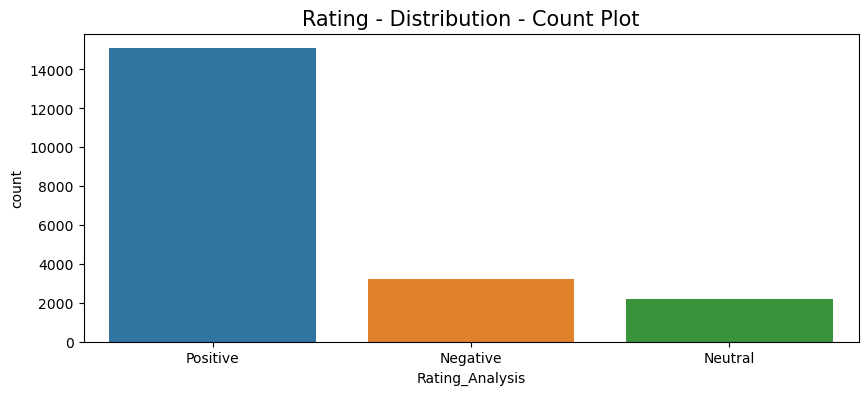

In [10]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['Rating_Analysis'])
plt.title('Rating - Distribution - Count Plot',size=15)
plt.show()

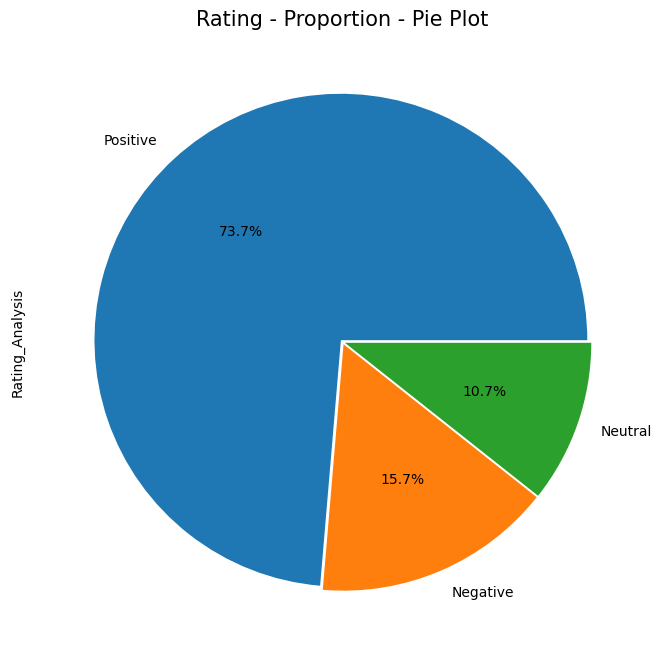

In [11]:
plt.figure(figsize=(8,8))
df['Rating_Analysis'].value_counts().plot(kind='pie',explode=[0.01,0.01,0.01],autopct='%.1f%%')
plt.title('Rating - Proportion - Pie Plot',size=15)
plt.show()

In [12]:
df.isnull().sum()

Review             0
Rating             0
Rating_Analysis    0
dtype: int64

* There is no null or missing entries in both the columns Review and Rating

In [13]:
count=df.isnull().sum().sort_values(ascending=True)
count

Review             0
Rating             0
Rating_Analysis    0
dtype: int64

In [14]:
percentage=((df.isnull().sum()/len(df)*100))
percentage

Review             0.0
Rating             0.0
Rating_Analysis    0.0
dtype: float64

In [15]:
missing_data=pd.concat([count,percentage],axis=1,keys=["Count","Percentage"])
missing_data


,Count,Percentage
Review,0,0.0
Rating,0,0.0
Rating_Analysis,0,0.0


In [16]:
df[df['Review'].duplicated()]

,Review,Rating,Rating_Analysis


* There is no duplicate observations in the dataset

In [17]:
df['Review'].unique()[1000]

'shame hotel wasnt good restaurant, arrived clift late afternoon struggle luggage 3 bags, reception staff unhelpful uninterested, eventually managed sorted shown room 9th floor, room suite tried make separate living room putting curtain inbetween bedroom living room, bathroom tiny dirty, stayed mum unfortunatley night didnt feel suffering bad foot, decided phone reception ask doctor come hotel told ther wasnt local receptionist closest told phone, eventually decided hospital just safe, came hospital evening doormen talking girls outside let, following night ate hotel restaurant aisa cuba fantastic, think hotel intrest restaurant bar, end day sleeping ignored wouldnt stay,  '

## **Exploratory Data Analysis**

In [18]:
stop_words = stopwords.words('english')

In [19]:
stop_words = pd.read_csv('stop.txt',header=None,squeeze=True)
stop_words

0               a
1             a's
2            able
3           about
4           above
          ...    
566         yours
567      yourself
568    yourselves
569             z
570          zero
Name: 0, Length: 571, dtype: object

In [20]:
def text_clean(text):
  """
  This Function make the text into lower case, remove punctuations, urls, escape sequences, etc.
  """
  text=text.lower()
  text=re.sub("\[.*?\]","",text)
  text=re.sub('\S*https?:\S*',"",text)
  text=re.sub("[%s]" % re.escape(string.punctuation),"",text)
  text=re.sub("\w*\d\w*","",text)
  text=re.sub("\n","",text)
  text=re.sub(' +', " ", text)
  return text
clean=lambda x : text_clean(x)

In [21]:
df['Cleaned_Review'] = df['Review'].apply(clean)
df.head()

,Review,Rating,Rating_Analysis,Cleaned_Review
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,Negative,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms not experience hotel monaco seattle...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay went seahawk game awesom...


**Word Frequency - Before Removing Stop Words**

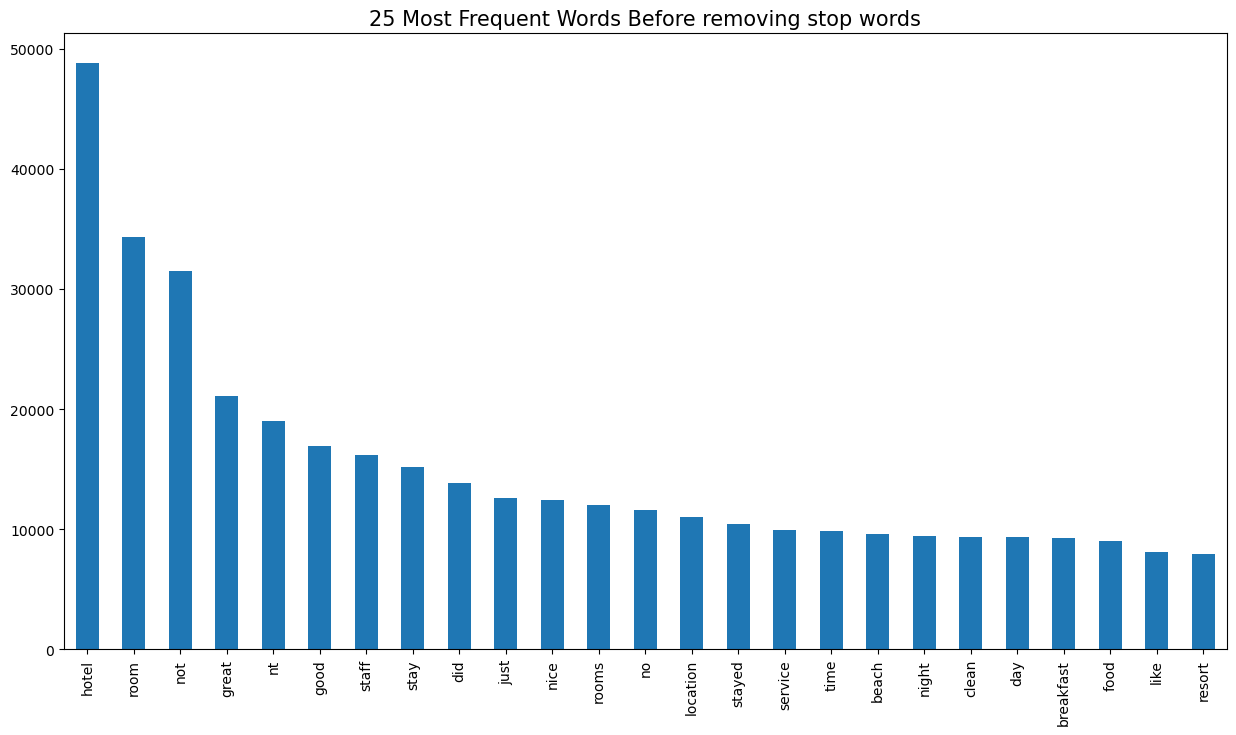

In [22]:
word_freq_1=pd.Series(" ".join(df['Cleaned_Review']).split()).value_counts()[:25]
word_freq_1.plot(kind='bar',figsize=(15,8))
plt.title('25 Most Frequent Words Before removing stop words',size=15)
plt.show()


Adding new word 'nt' to the stop words list, so that it will be removed.

In [23]:
additional_stop_words = ['nt']
stop_words=stop_words.append(pd.Series(additional_stop_words),ignore_index = True)
stop_words

0               a
1             a's
2            able
3           about
4           above
          ...    
567      yourself
568    yourselves
569             z
570          zero
571            nt
Length: 572, dtype: object

In [24]:
df['Cleaned_Review']=df['Cleaned_Review'].apply(lambda x: " ".join(x for x in x.split() if x not in list(stop_words)))
df.head()

,Review,Rating,Rating_Analysis,Cleaned_Review
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking good deal stay ho...
1,ok nothing special charge diamond member hilto...,2,Negative,special charge diamond member hilton decided c...
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay seahawk game awesome dow...


**Word Frequency After Removing Stop Words**

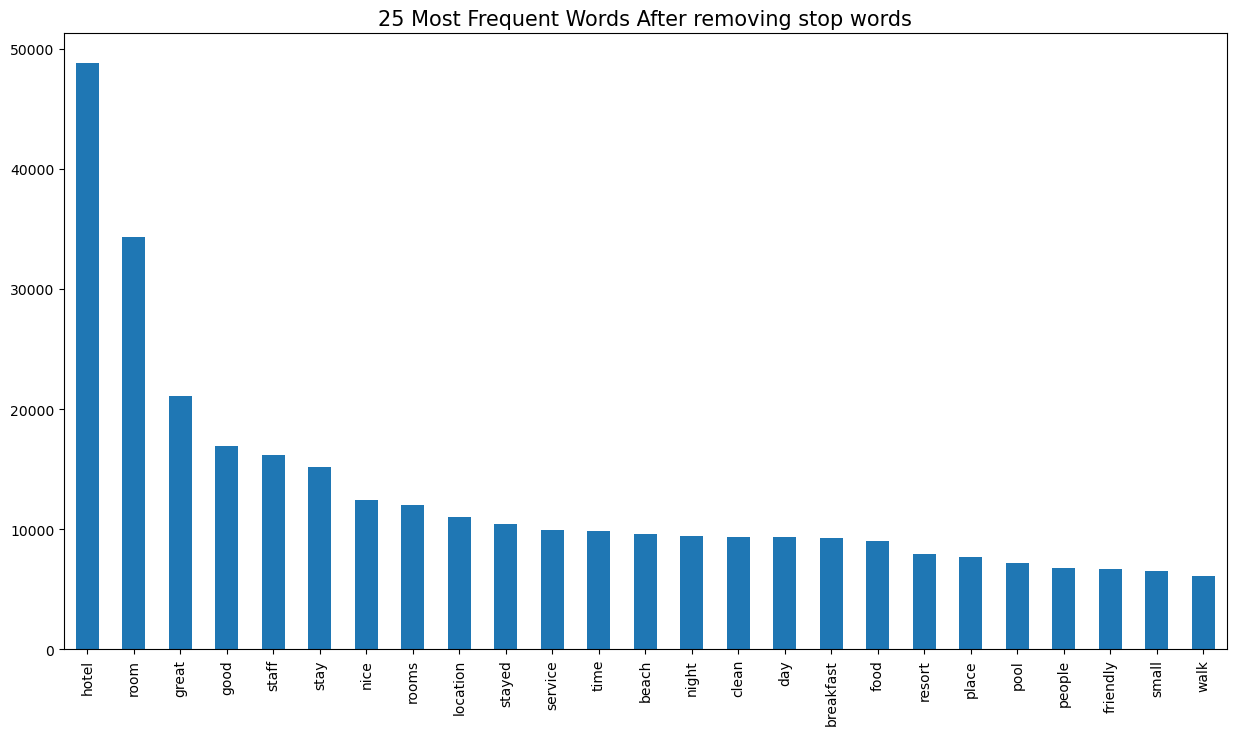

In [25]:
word_freq_2=pd.Series(" ".join(df['Cleaned_Review']).split()).value_counts()[:25]
word_freq_2.plot(kind='bar',figsize=(15,8))
fig=plt.title('25 Most Frequent Words After removing stop words',size=15)
plt.show()

From the Bar plot, we can observe that

Most freqently used Stop words that are unmeaningfull have been removed

**Lemmatization**

In [26]:
lemmatizer = WordNetLemmatizer()
w_tokenizer=WhitespaceTokenizer()

In [27]:
def lemmatize(txt):
  """
  This function takes text string as input lemmatize it to its root/base/stem word.
  """
  list_review=[lemmatizer.lemmatize(word=word, pos=tag[0].lower()) if tag[0].lower() in ['a','r','n','v'] else word for word, tag in pos_tag(w_tokenizer.tokenize(txt))]
  return (' '.join([x for x in list_review if x]))

In [28]:
df['Lemmatized_Review']=df['Cleaned_Review'].apply(lambda x: lemmatize(x))
df.head()

,Review,Rating,Rating_Analysis,Cleaned_Review,Lemmatized_Review
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking good deal stay ho...,nice hotel expensive parking good deal stay ho...
1,ok nothing special charge diamond member hilto...,2,Negative,special charge diamond member hilton decided c...,special charge diamond member hilton decide ch...
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay seahawk game awesome dow...,great stay great stay seahawk game awesome dow...


**Review Before Lemmatization**

In [29]:
df['Cleaned_Review'][1000]

'shame hotel wasnt good restaurant arrived clift late afternoon struggle luggage bags reception staff unhelpful uninterested eventually managed sorted shown room floor room suite make separate living room putting curtain inbetween bedroom living room bathroom tiny dirty stayed mum unfortunatley night didnt feel suffering bad foot decided phone reception doctor hotel told ther wasnt local receptionist closest told phone eventually decided hospital safe hospital evening doormen talking girls night ate hotel restaurant aisa cuba fantastic hotel intrest restaurant bar end day sleeping wouldnt stay'

In [30]:
len(word_tokenize(df['Cleaned_Review'][1000]))

84

In [31]:
len(df['Cleaned_Review'][1000])

599

check for length of words that are lemmatized.

**Review After Lemmatization**

In [32]:
df['Lemmatized_Review'][1000]

'shame hotel wasnt good restaurant arrive clift late afternoon struggle luggage bags reception staff unhelpful uninterested eventually manage sort show room floor room suite make separate living room put curtain inbetween bedroom living room bathroom tiny dirty stay mum unfortunatley night didnt feel suffer bad foot decide phone reception doctor hotel tell ther wasnt local receptionist closest tell phone eventually decide hospital safe hospital even doorman talk girl night eat hotel restaurant aisa cuba fantastic hotel intrest restaurant bar end day sleep wouldnt stay'

In [33]:
len(word_tokenize(df['Lemmatized_Review'][1000]))

84

In [34]:
len(df['Lemmatized_Review'][1000])

573

By applying lemmatization, we can observe that

* Number of words in the Review are retained
* Number of Characters in the Review have been reduced from 599 to 573.
* For ex: Words like 'arrived' and 'talking' are converted to 'arrive' and 'talk'.
* They are converted to their base/root/stem words.

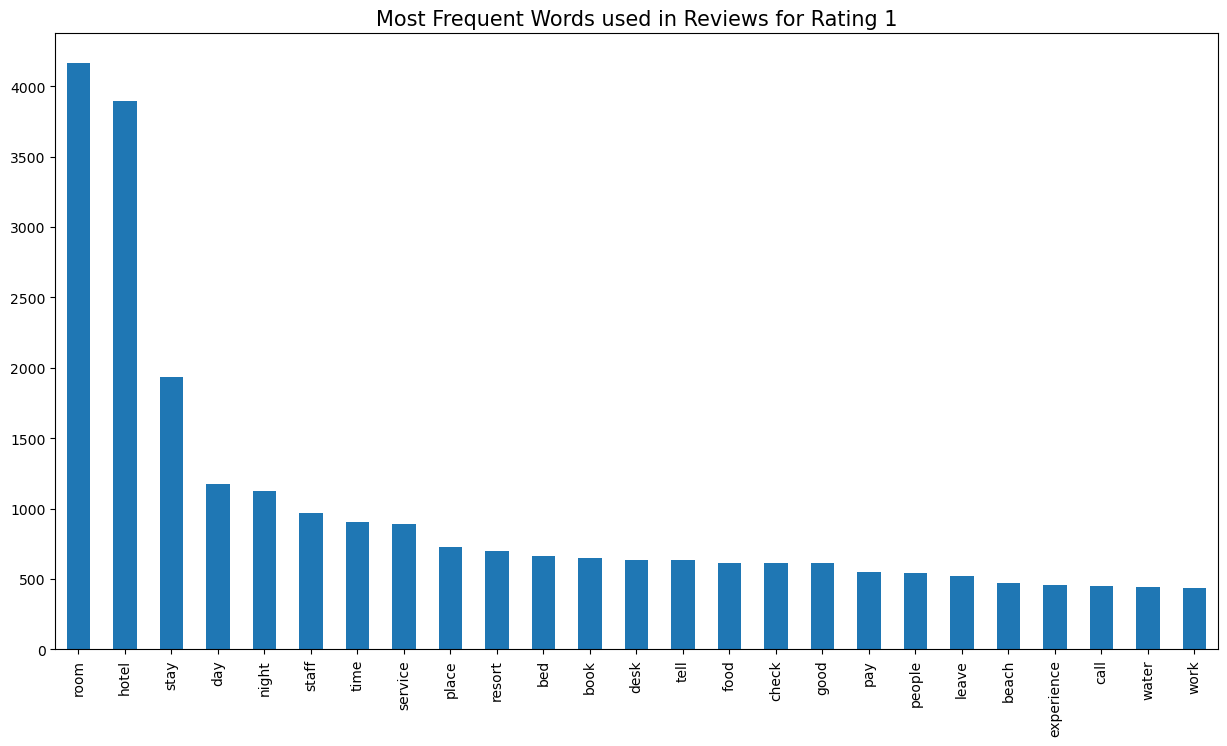

In [35]:
word_freq_rating_1=pd.Series(" ".join(df[df['Rating']==1]['Lemmatized_Review']).split()).value_counts()[:25]
word_freq_rating_1.plot(kind='bar',figsize=(15,8))
plt.title('Most Frequent Words used in Reviews for Rating 1',size=15)
plt.show()

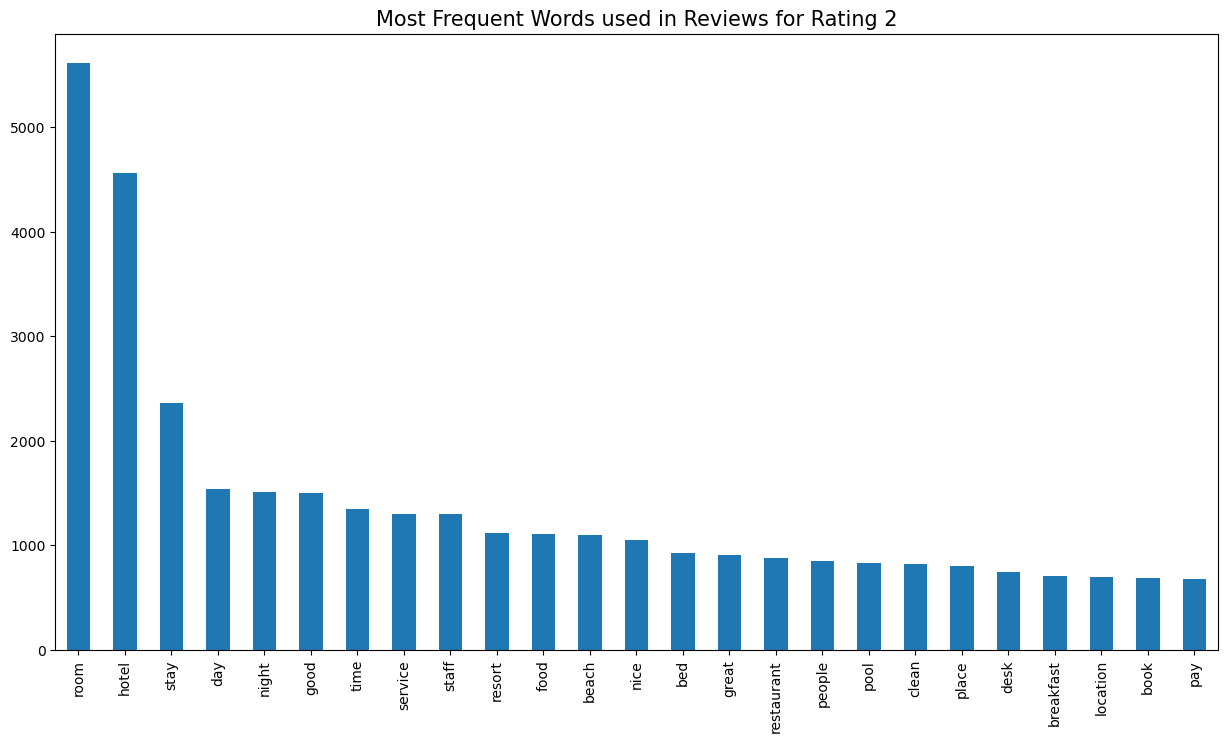

In [36]:
word_freq_rating_2=pd.Series(" ".join(df[df['Rating']==2]['Lemmatized_Review']).split()).value_counts()[:25]
word_freq_rating_2.plot(kind='bar',figsize=(15,8))
plt.title('Most Frequent Words used in Reviews for Rating 2',size=15)
plt.show()


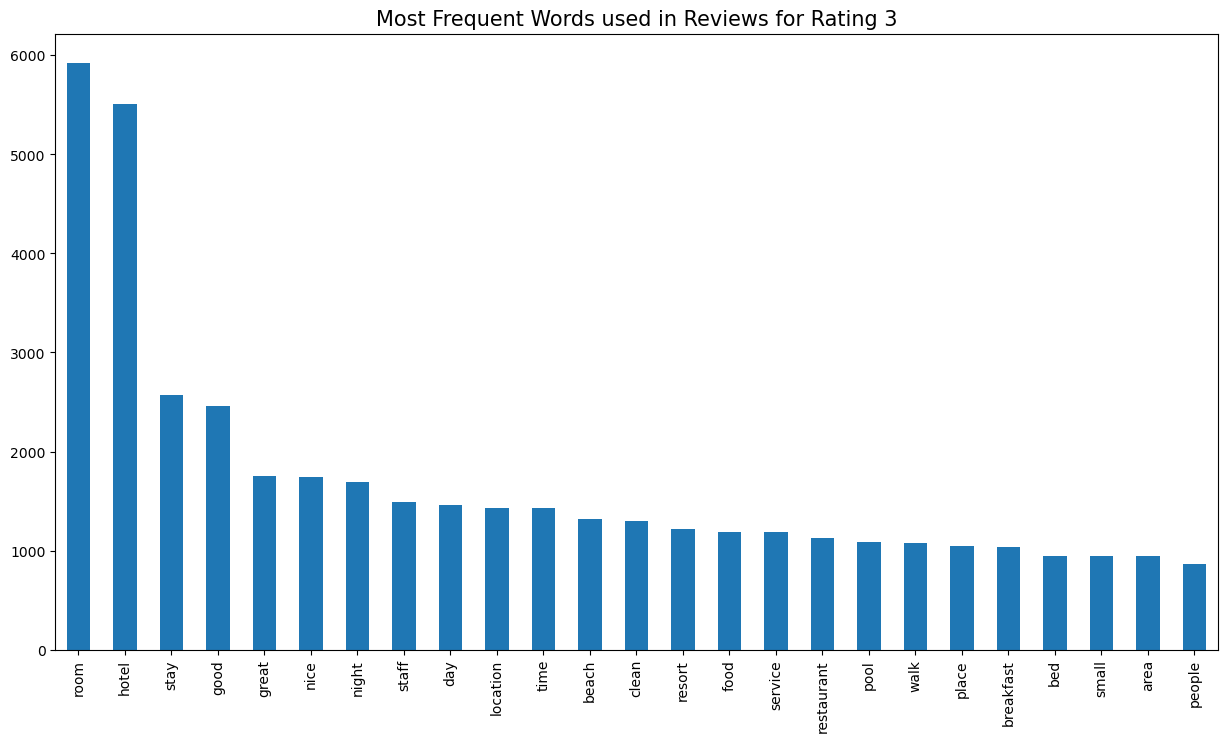

In [37]:
word_freq_rating_3=pd.Series(" ".join(df[df['Rating']==3]['Lemmatized_Review']).split()).value_counts()[:25]
word_freq_rating_3.plot(kind='bar',figsize=(15,8))
plt.title('Most Frequent Words used in Reviews for Rating 3',size=15)
plt.show()

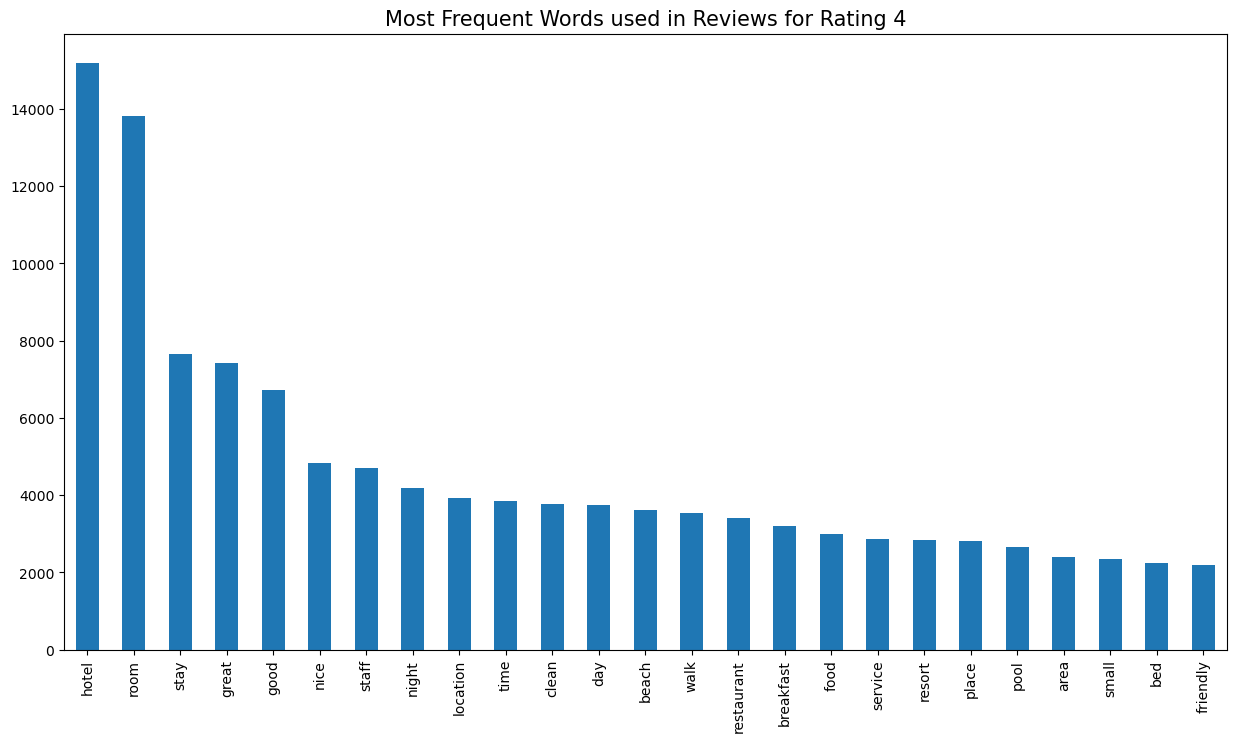

In [38]:
word_freq_rating_4=pd.Series(" ".join(df[df['Rating']==4]['Lemmatized_Review']).split()).value_counts()[:25]
word_freq_rating_4.plot(kind='bar',figsize=(15,8))
plt.title('Most Frequent Words used in Reviews for Rating 4',size=15)
plt.show()


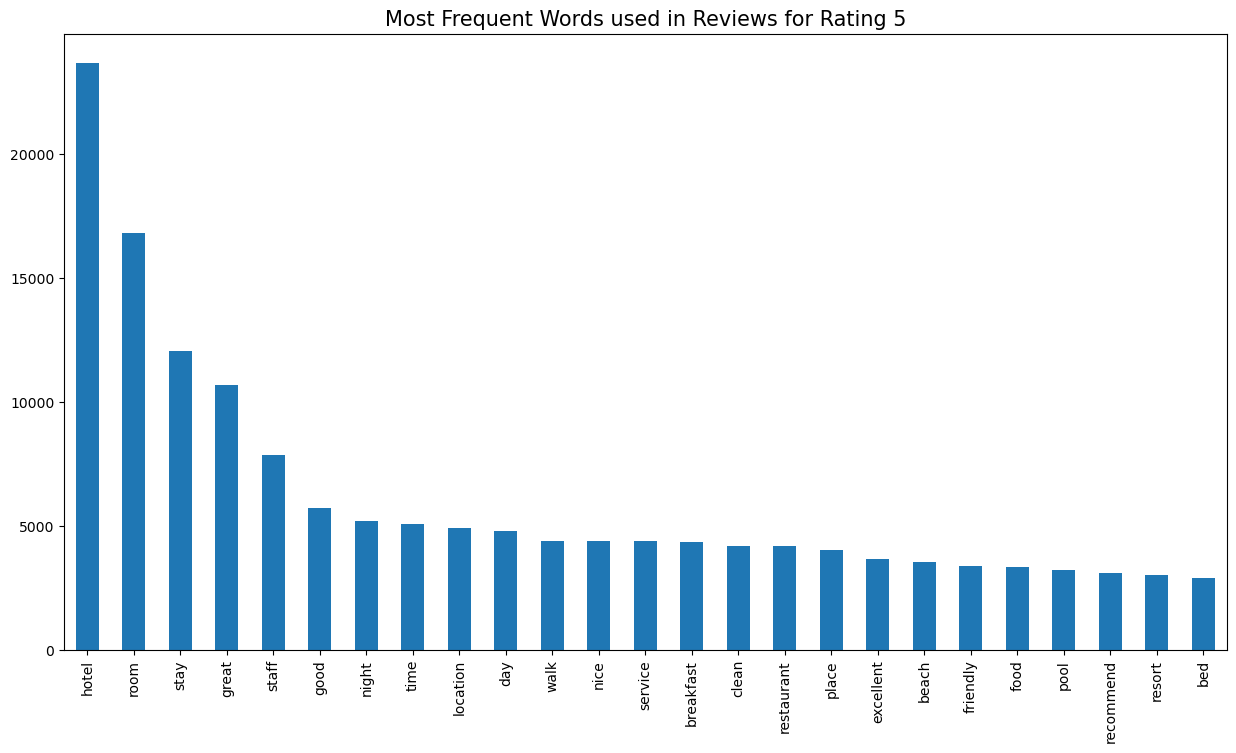

In [39]:
word_freq_rating_5=pd.Series(" ".join(df[df['Rating']==5]['Lemmatized_Review']).split()).value_counts()[:25]
word_freq_rating_5.plot(kind='bar',figsize=(15,8))
plt.title('Most Frequent Words used in Reviews for Rating 5',size=15)
plt.show()

**Sentiment Analysis Using TextBlob**

In [40]:
def sentiment_analysis_textblob(review):
  """
  This Function takes review (word/sentence/corpus) as input and find Subjectivity and Polarity
  """
  sentiment=TextBlob(review).sentiment
  return pd.Series([sentiment.subjectivity,sentiment.polarity])
df[['subjectivity','polarity']]=df['Lemmatized_Review'].apply(lambda x : sentiment_analysis_textblob(x))
df.head()

,Review,Rating,Rating_Analysis,Cleaned_Review,Lemmatized_Review,subjectivity,polarity
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking good deal stay ho...,nice hotel expensive parking good deal stay ho...,0.723158,0.229599
1,ok nothing special charge diamond member hilto...,2,Negative,special charge diamond member hilton decided c...,special charge diamond member hilton decide ch...,0.534312,0.222302
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.598765,0.341534
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.691228,0.504825
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay seahawk game awesome dow...,great stay great stay seahawk game awesome dow...,0.696753,0.475649


In [41]:
def polarity_score(score):
  """
  This function takes polarity score found from TextBlob sentiment and try to classify whether the review is Positive/Negative/Neutral
  """
  if score>0:
    return('Positive')
  elif score==0:
    return('Neutral')
  else:
    return('Negative')
df['sentiment_polarity']=df['polarity'].apply(lambda x : polarity_score(x))
df.head()

,Review,Rating,Rating_Analysis,Cleaned_Review,Lemmatized_Review,subjectivity,polarity,sentiment_polarity
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking good deal stay ho...,nice hotel expensive parking good deal stay ho...,0.723158,0.229599,Positive
1,ok nothing special charge diamond member hilto...,2,Negative,special charge diamond member hilton decided c...,special charge diamond member hilton decide ch...,0.534312,0.222302,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.598765,0.341534,Positive
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.691228,0.504825,Positive
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay seahawk game awesome dow...,great stay great stay seahawk game awesome dow...,0.696753,0.475649,Positive


In [42]:
df['polarity'].describe()

count    20491.000000
mean         0.290467
std          0.198634
min         -1.000000
25%          0.185394
50%          0.301061
75%          0.411881
max          1.000000
Name: polarity, dtype: float64

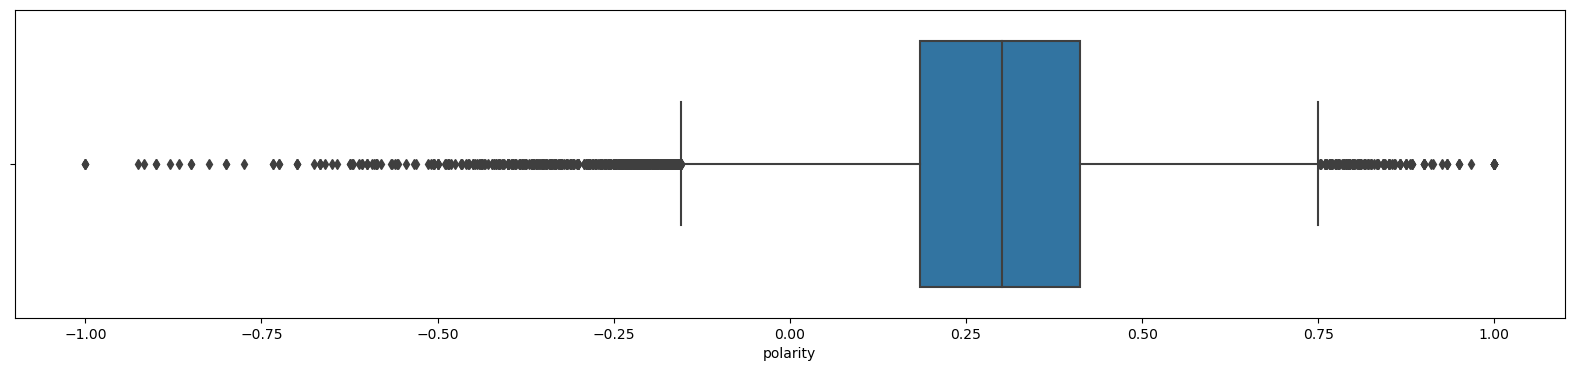

In [43]:
plt.figure(figsize=(20,4))
sns.boxplot(x=df['polarity'])
plt.show()

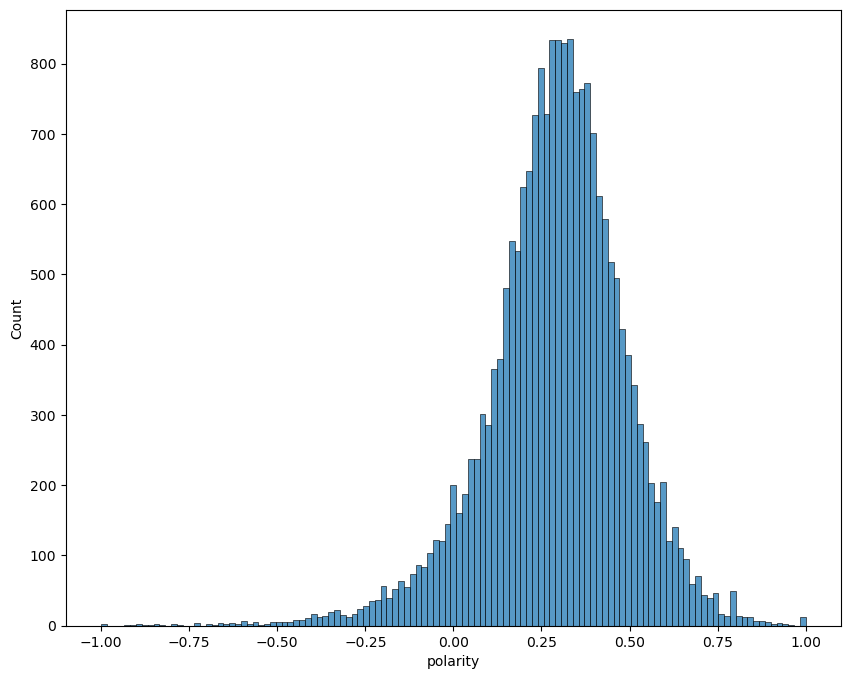

In [44]:
plt.figure(figsize=(10,8))
sns.histplot(df['polarity'])
plt.show()

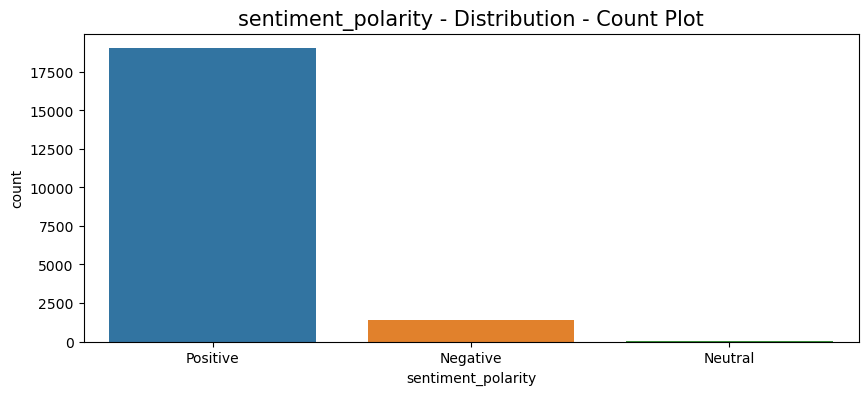

In [45]:
plt.figure(figsize=(10,4))
sns.countplot(x=df.sentiment_polarity)
plt.title('sentiment_polarity - Distribution - Count Plot',size=15)
plt.show()

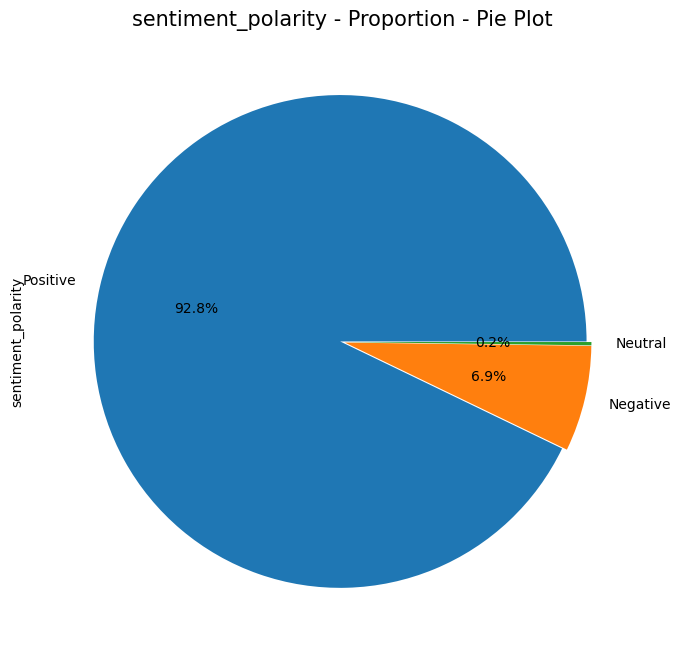

In [46]:
plt.figure(figsize=(8,8))
df.sentiment_polarity.value_counts().plot(kind='pie',explode=[0.01,0.01,0.01],autopct='%.1f%%')
plt.title('sentiment_polarity - Proportion - Pie Plot',size=15)
plt.show()

**Sentiment Analysis using Vader Lexicon**

In [47]:
SIA = SentimentIntensityAnalyzer()
df['Vader_Lexicon'] = df['Lemmatized_Review'].apply(lambda x : SIA.polarity_scores(x))
df.head()

,Review,Rating,Rating_Analysis,Cleaned_Review,Lemmatized_Review,subjectivity,polarity,sentiment_polarity,Vader_Lexicon
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking good deal stay ho...,nice hotel expensive parking good deal stay ho...,0.723158,0.229599,Positive,"{'neg': 0.064, 'neu': 0.608, 'pos': 0.329, 'co..."
1,ok nothing special charge diamond member hilto...,2,Negative,special charge diamond member hilton decided c...,special charge diamond member hilton decide ch...,0.534312,0.222302,Positive,"{'neg': 0.049, 'neu': 0.735, 'pos': 0.216, 'co..."
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.598765,0.341534,Positive,"{'neg': 0.048, 'neu': 0.677, 'pos': 0.275, 'co..."
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.691228,0.504825,Positive,"{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'comp..."
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay seahawk game awesome dow...,great stay great stay seahawk game awesome dow...,0.696753,0.475649,Positive,"{'neg': 0.078, 'neu': 0.623, 'pos': 0.299, 'co..."


In [48]:
df=pd.concat([df.drop(['Vader_Lexicon'],axis=1),df['Vader_Lexicon'].apply(pd.Series)],axis=1)
df.head()

,Review,Rating,Rating_Analysis,Cleaned_Review,Lemmatized_Review,subjectivity,polarity,sentiment_polarity,neg,neu,pos,compound
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking good deal stay ho...,nice hotel expensive parking good deal stay ho...,0.723158,0.229599,Positive,0.064,0.608,0.329,0.9769
1,ok nothing special charge diamond member hilto...,2,Negative,special charge diamond member hilton decided c...,special charge diamond member hilton decide ch...,0.534312,0.222302,Positive,0.049,0.735,0.216,0.9904
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.598765,0.341534,Positive,0.048,0.677,0.275,0.9937
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.691228,0.504825,Positive,0.000,0.564,0.436,0.9940
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay seahawk game awesome dow...,great stay great stay seahawk game awesome dow...,0.696753,0.475649,Positive,0.078,0.623,0.299,0.9929


In [49]:
def sentiment_analysis_vader_lexicon(compound_value):
  """
  This function takes input as compound value found from Vader Lexicon and try to classify
  whether the review is Positive/Negative/Neutral
  """
  if compound_value>= 0.05:
    return 'Positive'
  elif (compound_value > -0.05) & (compound_value< 0.05):
    return 'Neutral'
  else:
    return 'Negative'
df['Sentiment_Vader_Compound']=df['compound'].apply(lambda x:sentiment_analysis_vader_lexicon(x))
df.head()

,Review,Rating,Rating_Analysis,Cleaned_Review,Lemmatized_Review,subjectivity,polarity,sentiment_polarity,neg,neu,pos,compound,Sentiment_Vader_Compound
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking good deal stay ho...,nice hotel expensive parking good deal stay ho...,0.723158,0.229599,Positive,0.064,0.608,0.329,0.9769,Positive
1,ok nothing special charge diamond member hilto...,2,Negative,special charge diamond member hilton decided c...,special charge diamond member hilton decide ch...,0.534312,0.222302,Positive,0.049,0.735,0.216,0.9904,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.598765,0.341534,Positive,0.048,0.677,0.275,0.9937,Positive
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.691228,0.504825,Positive,0.000,0.564,0.436,0.9940,Positive
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay seahawk game awesome dow...,great stay great stay seahawk game awesome dow...,0.696753,0.475649,Positive,0.078,0.623,0.299,0.9929,Positive


In [50]:
df['compound'].describe()

count    20491.000000
mean         0.821092
std          0.418668
min         -0.995800
25%          0.916900
50%          0.971200
75%          0.987600
max          0.999900
Name: compound, dtype: float64

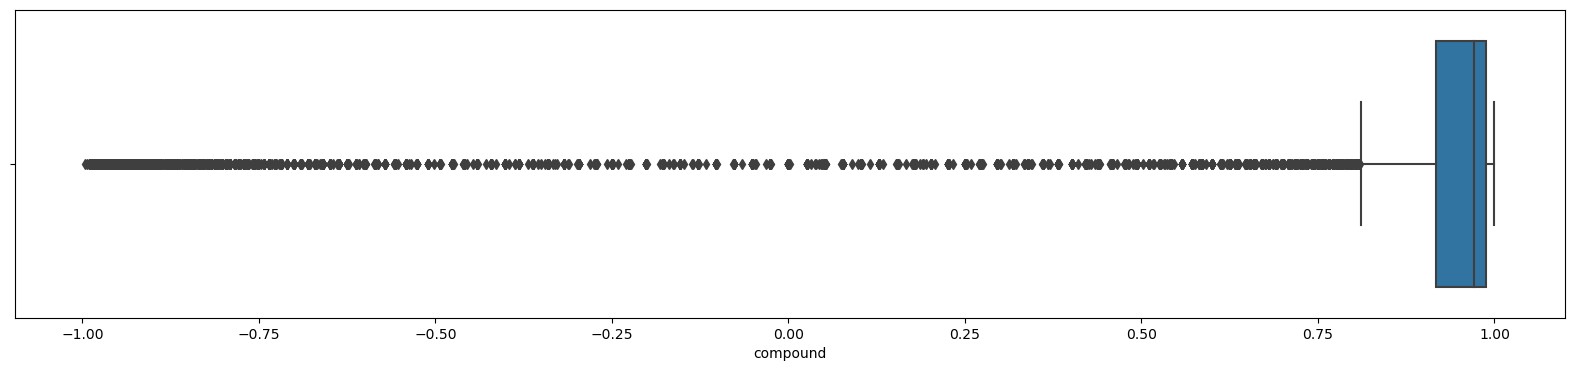

In [51]:
plt.figure(figsize=(20,4))
sns.boxplot(x=df['compound'])
plt.show()

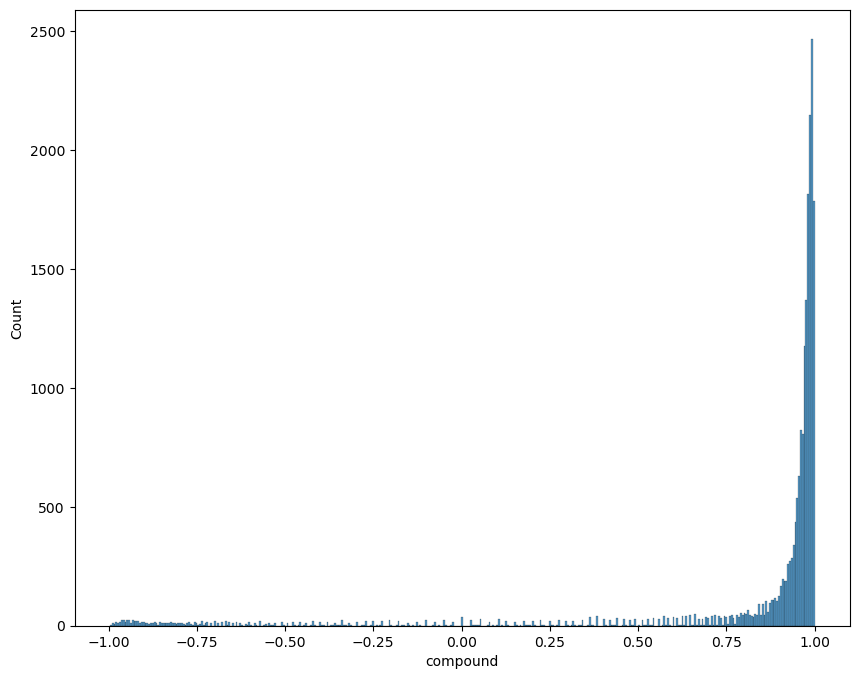

In [52]:
plt.figure(figsize=(10,8))
sns.histplot(df['compound'])
plt.show()

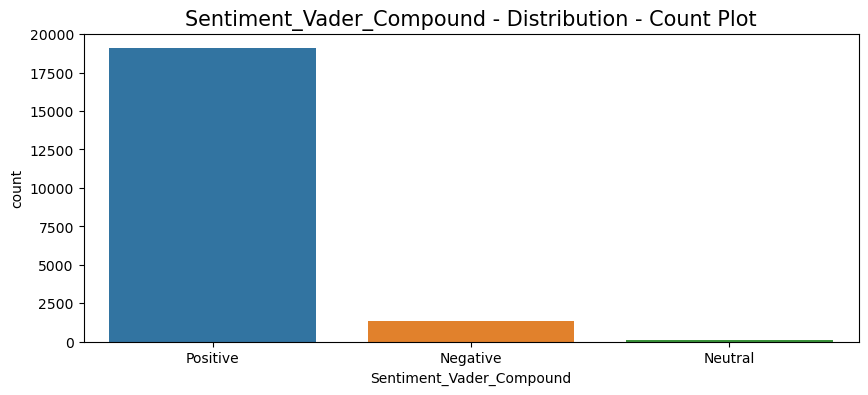

In [53]:
plt.figure(figsize=(10,4))
sns.countplot(x=df.Sentiment_Vader_Compound)
plt.title('Sentiment_Vader_Compound - Distribution - Count Plot',size=15)
plt.show()

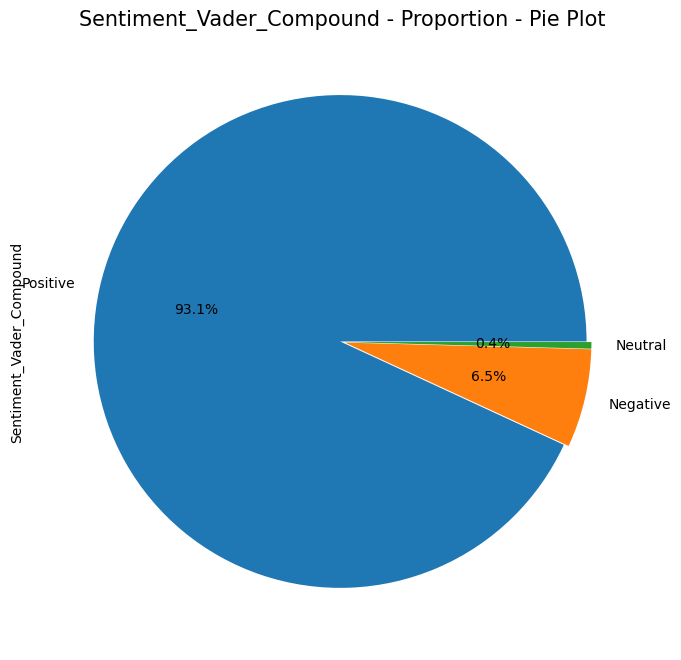

In [54]:
plt.figure(figsize=(8,8))
df.Sentiment_Vader_Compound.value_counts().plot(kind='pie',explode=[0.01,0.01,0.01],autopct='%.1f%%')
plt.title('Sentiment_Vader_Compound - Proportion - Pie Plot',size=15)
plt.show()

**Sentiment Analysis using Opinion Lexicon with Spacy(Positive/Negative Dataset)**

In [55]:
#Import list of positive words. Set the values as 1
positive_words = pd.read_csv('positive-words.txt',header=None,encoding='latin-1',error_bad_lines=False)
positive_words['value']=1
positive_words.head()

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


,0,value
0,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...,1
1,;,1
2,; Opinion Lexicon: Positive,1
3,;,1
4,; This file contains a list of POSITIVE opinio...,1


In [56]:
#Import list of negative words. Set the values as -1
negative_words = pd.read_csv('negative-words.txt',header=None,encoding='latin-1',error_bad_lines=False)
negative_words['value']=-1
negative_words.head()

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


,0,value
0,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...,-1
1,;,-1
2,; Opinion Lexicon: Negative,-1
3,;,-1
4,; This file contains a list of NEGATIVE opinio...,-1


In [57]:
#Combining both positive and negative words and making it a dictionary.
positive_negative = pd.concat([positive_words,negative_words])
positive_negative_words=positive_negative.set_index(0)['value'].to_dict()
positive_negative_words

{';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;': 1,
 '; ': -1,
 '; Opinion Lexicon: Positive': 1,
 ';': -1,
 '; This file contains a list of POSITIVE opinion words (or sentiment words).': 1,
 '; This file and the papers can all be downloaded from ': -1,
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html': -1,
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ': -1,
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ': -1,
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ': -1,
 '; Notes: ': -1,
 ';    1. The appearance of an opinion word in a sentence does not necessarily  ': -1,
 ';       mean that the sentence expresses a positive or negative opinion. ': -1,
 ';       See the paper below:': -1,
 ';       Bing Liu. "Sentiment Analysis and Subjectivity." An chapter in ': -1,
 ';    2. You will notice many misspelled words in the list. They are not ': -1,
 ';       mistake

In [58]:
nlp=spacy.load('en_core_web_sm')

In [59]:
def sentiment_analysis_spacy(text: str=None):
  """
  This function gets the input string, Use pretrained model "en_core_web_sm" to preprocess the input string,
  Assign each word a sentiment value (+1 for positive words, -1 for negative words) sum it up for each sentence.
  and return the sum value.
  """
  senti_score = 0
  if text:
    sentence = nlp(text)
    for word in sentence:
      senti_score = senti_score + positive_negative_words.get(word.lemma_,0)
  return senti_score

In [60]:
sentiment_analysis_spacy('happy')

1

In [61]:
sentiment_analysis_spacy('sad')


-1

In [62]:
df['sentiment_spacy_score']=df['Lemmatized_Review'].apply(lambda x: sentiment_analysis_spacy(x))
df.head()


,Review,Rating,Rating_Analysis,Cleaned_Review,Lemmatized_Review,subjectivity,polarity,sentiment_polarity,neg,neu,pos,compound,Sentiment_Vader_Compound,sentiment_spacy_score
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking good deal stay ho...,nice hotel expensive parking good deal stay ho...,0.723158,0.229599,Positive,0.064,0.608,0.329,0.9769,Positive,5
1,ok nothing special charge diamond member hilto...,2,Negative,special charge diamond member hilton decided c...,special charge diamond member hilton decide ch...,0.534312,0.222302,Positive,0.049,0.735,0.216,0.9904,Positive,12
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.598765,0.341534,Positive,0.048,0.677,0.275,0.9937,Positive,10
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.691228,0.504825,Positive,0.000,0.564,0.436,0.9940,Positive,14
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay seahawk game awesome dow...,great stay great stay seahawk game awesome dow...,0.696753,0.475649,Positive,0.078,0.623,0.299,0.9929,Positive,5


In [63]:
def spacy_score(score):
  """
  This function takes sentiment_spacy_pos_neg score found from Spacy sentiment and try to classify whether the review is Positive/Negative/Neutral
  """
  if score>0:
    return('Positive')
  elif score==0:
    return('Neutral')
  else:
    return('Negative')
df['sentiment_spacy']=df['sentiment_spacy_score'].apply(spacy_score)
df.head()

,Review,Rating,Rating_Analysis,Cleaned_Review,Lemmatized_Review,subjectivity,polarity,sentiment_polarity,neg,neu,pos,compound,Sentiment_Vader_Compound,sentiment_spacy_score,sentiment_spacy
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking good deal stay ho...,nice hotel expensive parking good deal stay ho...,0.723158,0.229599,Positive,0.064,0.608,0.329,0.9769,Positive,5,Positive
1,ok nothing special charge diamond member hilto...,2,Negative,special charge diamond member hilton decided c...,special charge diamond member hilton decide ch...,0.534312,0.222302,Positive,0.049,0.735,0.216,0.9904,Positive,12,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.598765,0.341534,Positive,0.048,0.677,0.275,0.9937,Positive,10,Positive
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.691228,0.504825,Positive,0.000,0.564,0.436,0.9940,Positive,14,Positive
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay seahawk game awesome dow...,great stay great stay seahawk game awesome dow...,0.696753,0.475649,Positive,0.078,0.623,0.299,0.9929,Positive,5,Positive


In [64]:
df['sentiment_spacy_score'].describe()

count    20491.000000
mean         6.983456
std          7.173916
min        -32.000000
25%          3.000000
50%          7.000000
75%         10.000000
max         83.000000
Name: sentiment_spacy_score, dtype: float64

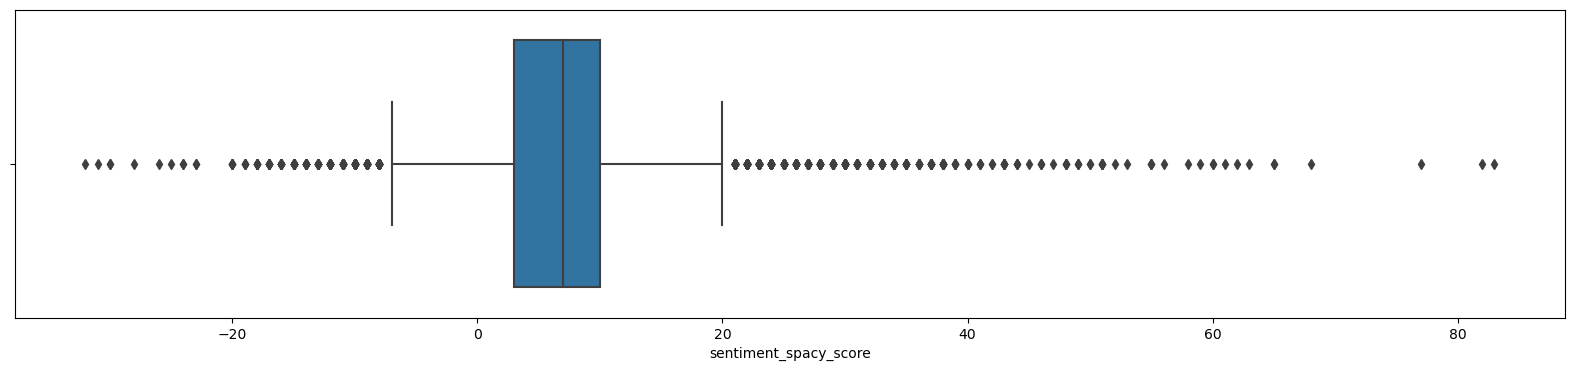

In [65]:
plt.figure(figsize=(20,4))
sns.boxplot(x=df['sentiment_spacy_score'])
plt.show()

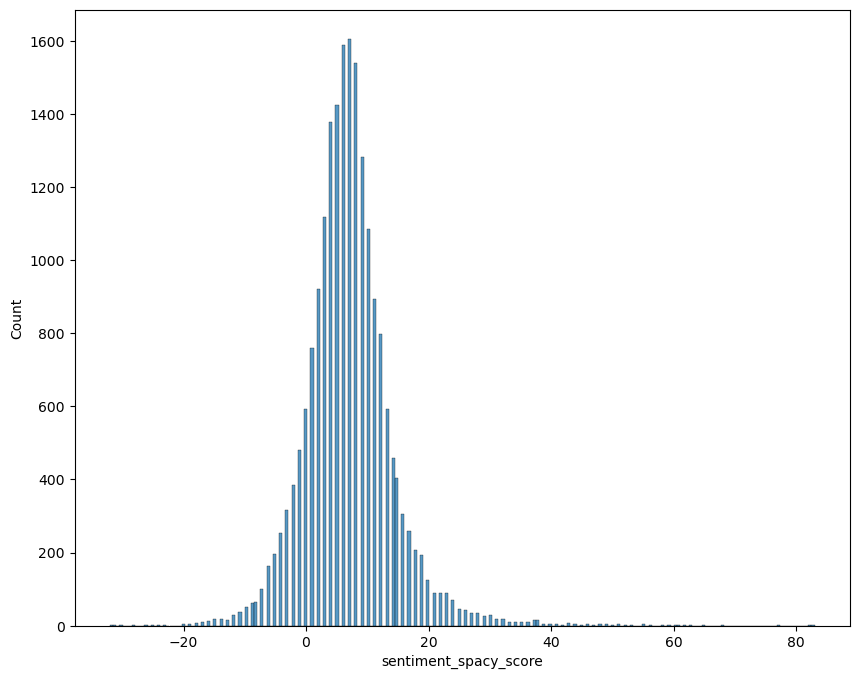

In [66]:
plt.figure(figsize=(10,8))
sns.histplot(df['sentiment_spacy_score'])
plt.show()

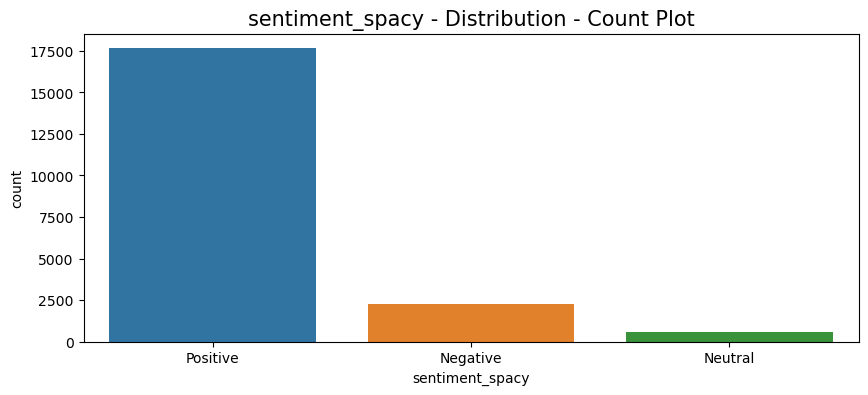

In [67]:
plt.figure(figsize=(10,4))
sns.countplot(x=df.sentiment_spacy)
plt.title('sentiment_spacy - Distribution - Count Plot',size=15)
plt.show()

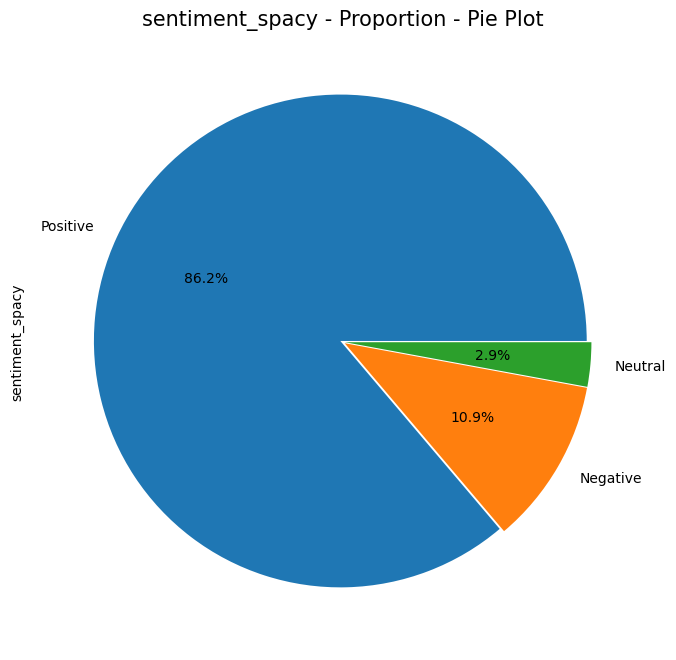

In [68]:
plt.figure(figsize=(8,8))
df.sentiment_spacy.value_counts().plot(kind='pie',explode=[0.01,0.01,0.01],autopct='%.1f%%')
plt.title('sentiment_spacy - Proportion - Pie Plot',size=15)
plt.show()

**Finding Number of Characters for each Review**

In [69]:
df['no_chars']=df['Lemmatized_Review'].apply(lambda x : len(x))
df.head()

,Review,Rating,Rating_Analysis,Cleaned_Review,Lemmatized_Review,subjectivity,polarity,sentiment_polarity,neg,neu,pos,compound,Sentiment_Vader_Compound,sentiment_spacy_score,sentiment_spacy,no_chars
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking good deal stay ho...,nice hotel expensive parking good deal stay ho...,0.723158,0.229599,Positive,0.064,0.608,0.329,0.9769,Positive,5,Positive,484
1,ok nothing special charge diamond member hilto...,2,Negative,special charge diamond member hilton decided c...,special charge diamond member hilton decide ch...,0.534312,0.222302,Positive,0.049,0.735,0.216,0.9904,Positive,12,Positive,1410
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.598765,0.341534,Positive,0.048,0.677,0.275,0.9937,Positive,10,Positive,1197
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.691228,0.504825,Positive,0.000,0.564,0.436,0.9940,Positive,14,Positive,523
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay seahawk game awesome dow...,great stay great stay seahawk game awesome dow...,0.696753,0.475649,Positive,0.078,0.623,0.299,0.9929,Positive,5,Positive,1007


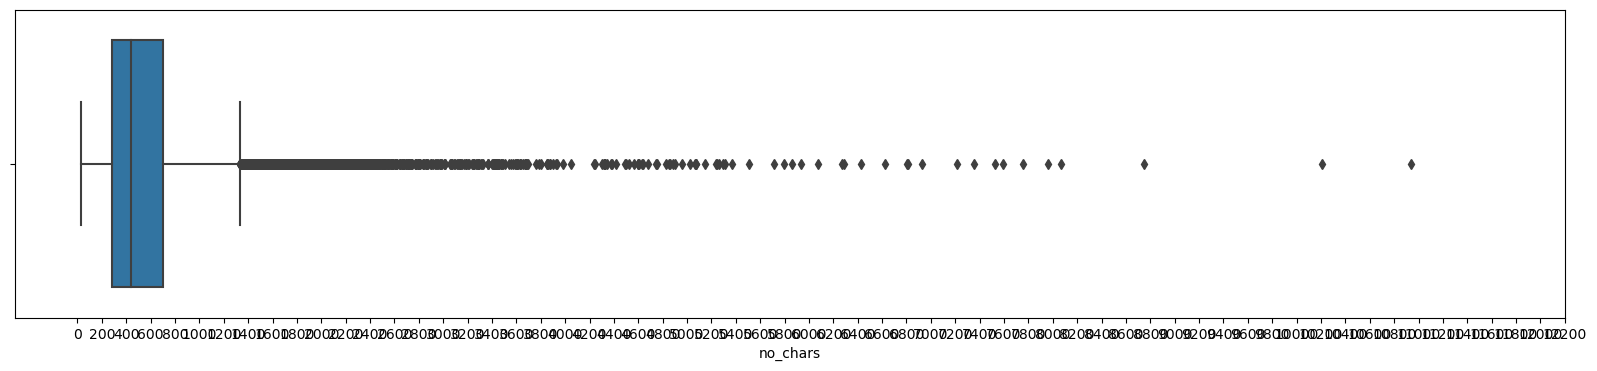

In [72]:
plt.figure(figsize=(20,4))
fig=sns.boxplot(x=df['no_chars'])
plt.xticks(np.arange(0, 12400, step=200))
plt.show()

In [73]:
df['no_chars'].describe()

count    20491.000000
mean       592.001464
std        552.376224
min         32.000000
25%        283.000000
50%        442.000000
75%        704.000000
max      10938.000000
Name: no_chars, dtype: float64

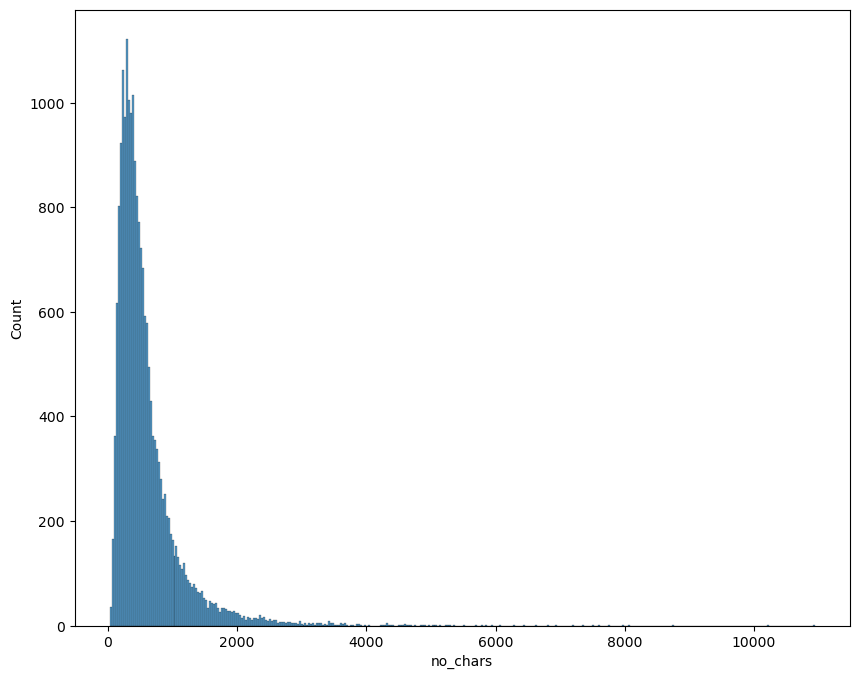

In [74]:
plt.figure(figsize=(10,8))
sns.histplot(df['no_chars'])
plt.show()

**Inference on Number of Characters per Review**

* Majority of the Reviews (Between 25% and 75% Quadrile) have Characters between 283 to 704
* On Average (Median), A user feeds 442 Characters for a Review
* Review with lowest number of Characters = 32
* Review with highest number of Characters = 10935
* Mean is greater than Median. Hence, Number of Characters in the Review Plot is Right/Positively Skewed.

**Finding Number of Words for each Review**

In [75]:
df['no_words']=df['Lemmatized_Review'].apply(lambda x : len(x.split(" ")))
df.head()

,Review,Rating,Rating_Analysis,Cleaned_Review,Lemmatized_Review,subjectivity,polarity,sentiment_polarity,neg,neu,pos,compound,Sentiment_Vader_Compound,sentiment_spacy_score,sentiment_spacy,no_chars,no_words
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking good deal stay ho...,nice hotel expensive parking good deal stay ho...,0.723158,0.229599,Positive,0.064,0.608,0.329,0.9769,Positive,5,Positive,484,73
1,ok nothing special charge diamond member hilto...,2,Negative,special charge diamond member hilton decided c...,special charge diamond member hilton decide ch...,0.534312,0.222302,Positive,0.049,0.735,0.216,0.9904,Positive,12,Positive,1410,205
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.598765,0.341534,Positive,0.048,0.677,0.275,0.9937,Positive,10,Positive,1197,174
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.691228,0.504825,Positive,0.000,0.564,0.436,0.9940,Positive,14,Positive,523,80
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay seahawk game awesome dow...,great stay great stay seahawk game awesome dow...,0.696753,0.475649,Positive,0.078,0.623,0.299,0.9929,Positive,5,Positive,1007,155


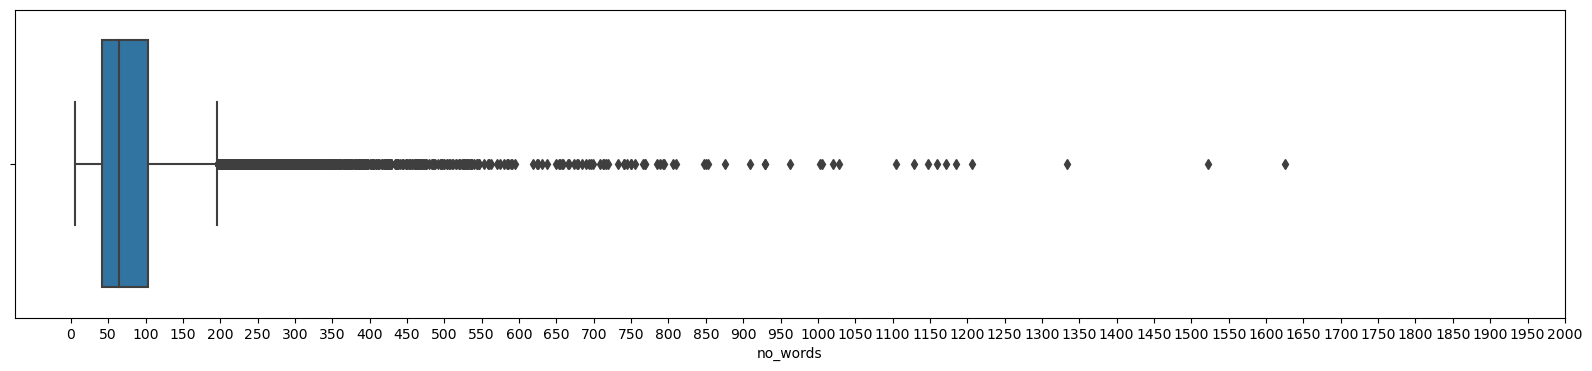

In [76]:
plt.figure(figsize=(20,4))
sns.boxplot(x=df['no_words'])
plt.xticks(np.arange(0, 2050, step=50))
plt.show()

In [77]:
df['no_words'].describe()

count    20491.000000
mean        87.172076
std         82.423191
min          6.000000
25%         41.000000
50%         65.000000
75%        103.000000
max       1626.000000
Name: no_words, dtype: float64

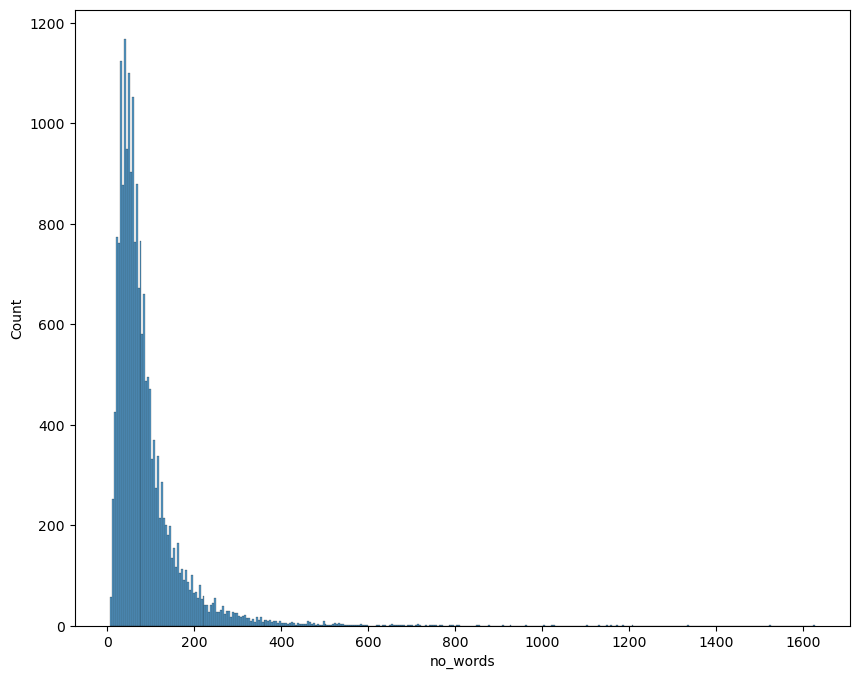

In [78]:
plt.figure(figsize=(10,8))
sns.histplot(df['no_words'])
plt.show()

**Inference on Number of Words per Review**

* Majority of the Reviews (Between 25% and 75% Quadrile) have words between 41 to 103
* On Average (Median), A user feeds 65 words for a Review
* Review with lowest number of words = 6
* Review with highest number of words = 1626
* Mean is greater than Median. Hence, Number of words in the Review Plot is Right/Positively Skewed.

In [79]:
df.rename(columns={'neg':'neg_senti_score','neu':'neu_senti_score','pos':'pos_senti_score'},inplace=True)
df.head()

,Review,Rating,Rating_Analysis,Cleaned_Review,Lemmatized_Review,subjectivity,polarity,sentiment_polarity,neg_senti_score,neu_senti_score,pos_senti_score,compound,Sentiment_Vader_Compound,sentiment_spacy_score,sentiment_spacy,no_chars,no_words
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking good deal stay ho...,nice hotel expensive parking good deal stay ho...,0.723158,0.229599,Positive,0.064,0.608,0.329,0.9769,Positive,5,Positive,484,73
1,ok nothing special charge diamond member hilto...,2,Negative,special charge diamond member hilton decided c...,special charge diamond member hilton decide ch...,0.534312,0.222302,Positive,0.049,0.735,0.216,0.9904,Positive,12,Positive,1410,205
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.598765,0.341534,Positive,0.048,0.677,0.275,0.9937,Positive,10,Positive,1197,174
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.691228,0.504825,Positive,0.000,0.564,0.436,0.9940,Positive,14,Positive,523,80
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay seahawk game awesome dow...,great stay great stay seahawk game awesome dow...,0.696753,0.475649,Positive,0.078,0.623,0.299,0.9929,Positive,5,Positive,1007,155


**Rating Vs Sentiment using TextBlob Polarity**

In [80]:
rating_vs_sentiment_polarity = pd.crosstab(index=df['Rating'],columns=df['sentiment_polarity'],
                                           values=df['sentiment_polarity'],aggfunc='count')
rating_vs_sentiment_polarity

sentiment_polarity,Negative,Neutral,Positive
Rating,,,
1,790,10,621
2,396,10,1387
3,139,6,2039
4,48,4,5987
5,49,14,8991


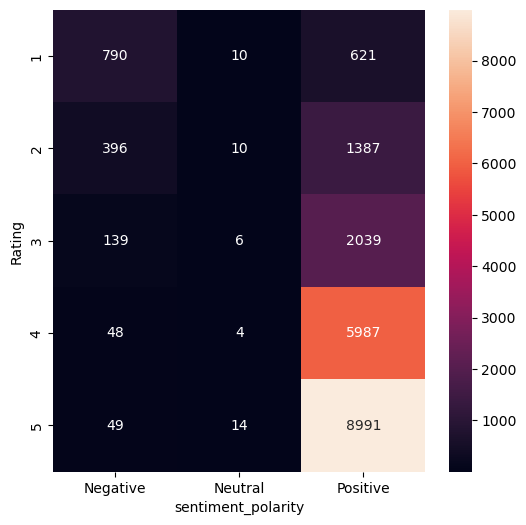

In [81]:
plt.figure(figsize=(6,6))
sns.heatmap(rating_vs_sentiment_polarity,annot=True,fmt='g')
plt.show()

In [82]:
analysis_polarity = rating_vs_sentiment_polarity
analysis_polarity['No. of Reviews']=df['Rating'].value_counts()
analysis_polarity['% Positive']=((analysis_polarity['Positive']/analysis_polarity['No. of Reviews'])*100).round(2)
analysis_polarity['% Neutral']=((analysis_polarity['Neutral']/analysis_polarity['No. of Reviews'])*100).round(2)
analysis_polarity['% Negative']=((analysis_polarity['Negative']/analysis_polarity['No. of Reviews'])*100).round(2)
analysis_polarity

sentiment_polarity,Negative,Neutral,Positive,No. of Reviews,% Positive,% Neutral,% Negative
Rating,,,,,,,
1,790,10,621,1421,43.70,0.70,55.59
2,396,10,1387,1793,77.36,0.56,22.09
3,139,6,2039,2184,93.36,0.27,6.36
4,48,4,5987,6039,99.14,0.07,0.79
5,49,14,8991,9054,99.30,0.15,0.54


**Rating Vs Sentiment using Vader Lexicon**

In [83]:
rating_vs_Sentiment_Vader_Compound = pd.crosstab(index=df['Rating'],columns=df['Sentiment_Vader_Compound'],
                                                 values=df['Sentiment_Vader_Compound'],aggfunc='count')
rating_vs_Sentiment_Vader_Compound


Sentiment_Vader_Compound,Negative,Neutral,Positive
Rating,,,
1,758,31,632
2,379,25,1389
3,110,13,2061
4,41,9,5989
5,35,11,9008


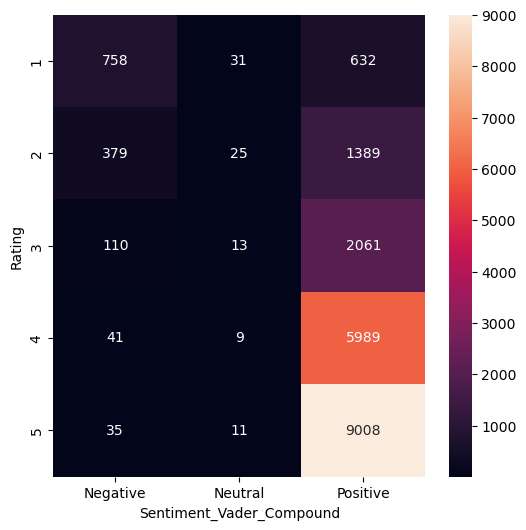

In [84]:
plt.figure(figsize=(6,6))
sns.heatmap(rating_vs_Sentiment_Vader_Compound,annot=True,fmt='g')
plt.show()

In [85]:
analysis_vader_lexicon = rating_vs_Sentiment_Vader_Compound
analysis_vader_lexicon['No. of Reviews']=df['Rating'].value_counts()
analysis_vader_lexicon['% Positive']=((analysis_vader_lexicon['Positive']/analysis_vader_lexicon['No. of Reviews'])*100).round(2)
analysis_vader_lexicon['% Neutral']=((analysis_vader_lexicon['Neutral']/analysis_vader_lexicon['No. of Reviews'])*100).round(2)
analysis_vader_lexicon['% Negative']=((analysis_vader_lexicon['Negative']/analysis_vader_lexicon['No. of Reviews'])*100).round(2)
analysis_vader_lexicon

Sentiment_Vader_Compound,Negative,Neutral,Positive,No. of Reviews,% Positive,% Neutral,% Negative
Rating,,,,,,,
1,758,31,632,1421,44.48,2.18,53.34
2,379,25,1389,1793,77.47,1.39,21.14
3,110,13,2061,2184,94.37,0.60,5.04
4,41,9,5989,6039,99.17,0.15,0.68
5,35,11,9008,9054,99.49,0.12,0.39


**Rating Vs Sentiment using Opinion Lexicon with Spacy**

In [86]:
rating_vs_sentiment_spacy = pd.crosstab(index=df['Rating'],columns=df['sentiment_spacy'],
                                           values=df['sentiment_spacy'],aggfunc='count')
rating_vs_sentiment_spacy

sentiment_spacy,Negative,Neutral,Positive
Rating,,,
1,1001,119,301
2,737,160,896
3,253,126,1805
4,156,101,5782
5,88,88,8878


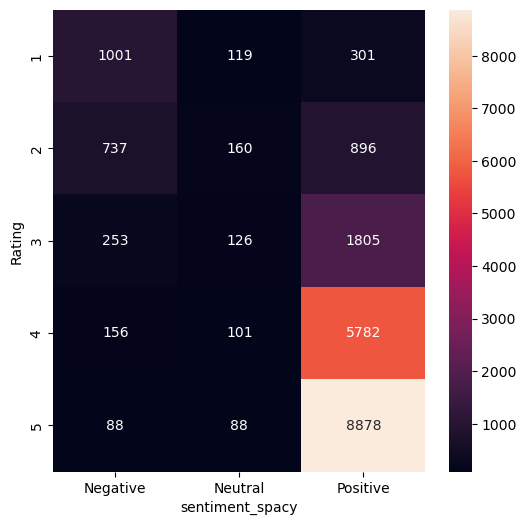

In [87]:
plt.figure(figsize=(6,6))
sns.heatmap(rating_vs_sentiment_spacy,annot=True,fmt='g')
plt.show()

In [88]:
analysis_spacy = rating_vs_sentiment_spacy
analysis_spacy['No. of Reviews']=df['Rating'].value_counts()
analysis_spacy['% Positive']=((analysis_spacy['Positive']/analysis_spacy['No. of Reviews'])*100).round(2)
analysis_spacy['% Neutral']=((analysis_spacy['Neutral']/analysis_spacy['No. of Reviews'])*100).round(2)
analysis_spacy['% Negative']=((analysis_spacy['Negative']/analysis_spacy['No. of Reviews'])*100).round(2)
analysis_spacy

sentiment_spacy,Negative,Neutral,Positive,No. of Reviews,% Positive,% Neutral,% Negative
Rating,,,,,,,
1,1001,119,301,1421,21.18,8.37,70.44
2,737,160,896,1793,49.97,8.92,41.10
3,253,126,1805,2184,82.65,5.77,11.58
4,156,101,5782,6039,95.74,1.67,2.58
5,88,88,8878,9054,98.06,0.97,0.97


In [89]:
df_positive=df[df['no_words']>100].sort_values("sentiment_spacy_score",ascending=False)[["Lemmatized_Review","Rating","sentiment_spacy_score"]]
df_positive.head(1)

,Lemmatized_Review,Rating,sentiment_spacy_score
18917,ocean blue excellent resort boyfriend stay oce...,5,83


In [90]:
df['Review'][18917]

'ocean blue excellent resort, boyfriend mid-20__Ç_é_ stayed ocean blue 6 days week june, awesome time relaxation beach ocean fruity frosty drinks, booked trip left read ocean blue reviews faithfully, little concerned negative reviews figured we__Ç_éö, think value ocean blue excellent booked hotel apple flight separately usa3000 ocean blue 57 day, reading reviews main complaints time food friendliness staff, travelers generally pretty happy hotel/grounds pools/beach rooms drinks, thing like note future ocean blue-goers all-inclusive travelers general all-inclusive resorts generally masses, tropical locale pretty inexpensive generally newer clean food drinks you__Ç_éö basic tgi friday__Ç_é_/outback/olive garden/etc, decent food price somewhat mass-produced, you__Ç_éÈe paying night hotel beach food alcohol activities you__Ç_éö paying nice meal high-end restaurant, saying goes pay not expect morton__Ç_é_ steakhouse meals not paying, advice i__Ç_é_x0096_ sure you__Ç_éêl enjoy review__Ç br/ 

In [91]:
df.loc[18917]

Review                      ocean blue excellent resort, boyfriend mid-20_...
Rating                                                                      5
Rating_Analysis                                                      Positive
Cleaned_Review              ocean blue excellent resort boyfriend stayed o...
Lemmatized_Review           ocean blue excellent resort boyfriend stay oce...
subjectivity                                                         0.545851
polarity                                                             0.306378
sentiment_polarity                                                   Positive
neg_senti_score                                                         0.056
neu_senti_score                                                         0.614
pos_senti_score                                                         0.331
compound                                                               0.9998
Sentiment_Vader_Compound                                        

**Most Negative Review**

In [92]:
df_negative=df[df['no_words']>100].sort_values("sentiment_spacy_score",ascending=True)[["Lemmatized_Review","Rating","sentiment_spacy_score"]]
df_negative.head(1)

,Lemmatized_Review,Rating,sentiment_spacy_score
18127,learn lesson major disappointment online servi...,1,-32


In [93]:
df['Review'][18127]

"learned lesson major disappointment used online service booked ramada limited tukwila attributes hotel general location not pay non-refundable numerous times years, satisfied, experience changed travel reservation habits forever, dissatisfaction does n't begin experience, stunned like it.there large confusion seattle ramadas, 4 5, called inn, ramada inn suites near sea-tac, place talking ramada limited tukwila, book hotel knowing, stay ramada, just fact facility scares me.i stayed nights wanted run hour arriving stuck paid late, van picked old did n't look business-like upholstery stained, 2 miles north sea-tac old pacific highway run-down/transitional neighborhood, casinos smoke rooms area, miles north ramada inn suites october confused review, arrival group 6 7 unsavory scary looking characters hanging corner 139th just arriving, feet door.i walked lobby night getting medical conference marriott-seatac lobby small court-tv blast lobby, lobby look decay old dusty fake flowers unhealt

In [94]:
df.loc[18127]

Review                      learned lesson major disappointment used onlin...
Rating                                                                      1
Rating_Analysis                                                      Negative
Cleaned_Review              learned lesson major disappointment online ser...
Lemmatized_Review           learn lesson major disappointment online servi...
subjectivity                                                         0.655379
polarity                                                            -0.258355
sentiment_polarity                                                   Negative
neg_senti_score                                                         0.216
neu_senti_score                                                         0.709
pos_senti_score                                                         0.075
compound                                                              -0.9892
Sentiment_Vader_Compound                                        

In [95]:
def get_top_n_words(df,n=None,ngram=None):
  """
  This function takes review as input and provide most frequent Bi-Gram or Tri-Gram Words.
  """
  vect_n_grams=CountVectorizer(max_features=2000,ngram_range=ngram).fit(df)
  bag_of_words=vect_n_grams.transform(df)
  sum_of_words=bag_of_words.sum(axis=0)
  word_frequency=[(word,sum_of_words[0,idx]) for word,idx in vect_n_grams.vocabulary_.items()]
  word_frequency=sorted(word_frequency,key=lambda x : x[1],reverse=True)
  return word_frequency[:n]

**Bi-Gram**

In [96]:
df_pos = df[df['sentiment_spacy']=='Positive']
df_neg = df[df['sentiment_spacy']=='Negative']

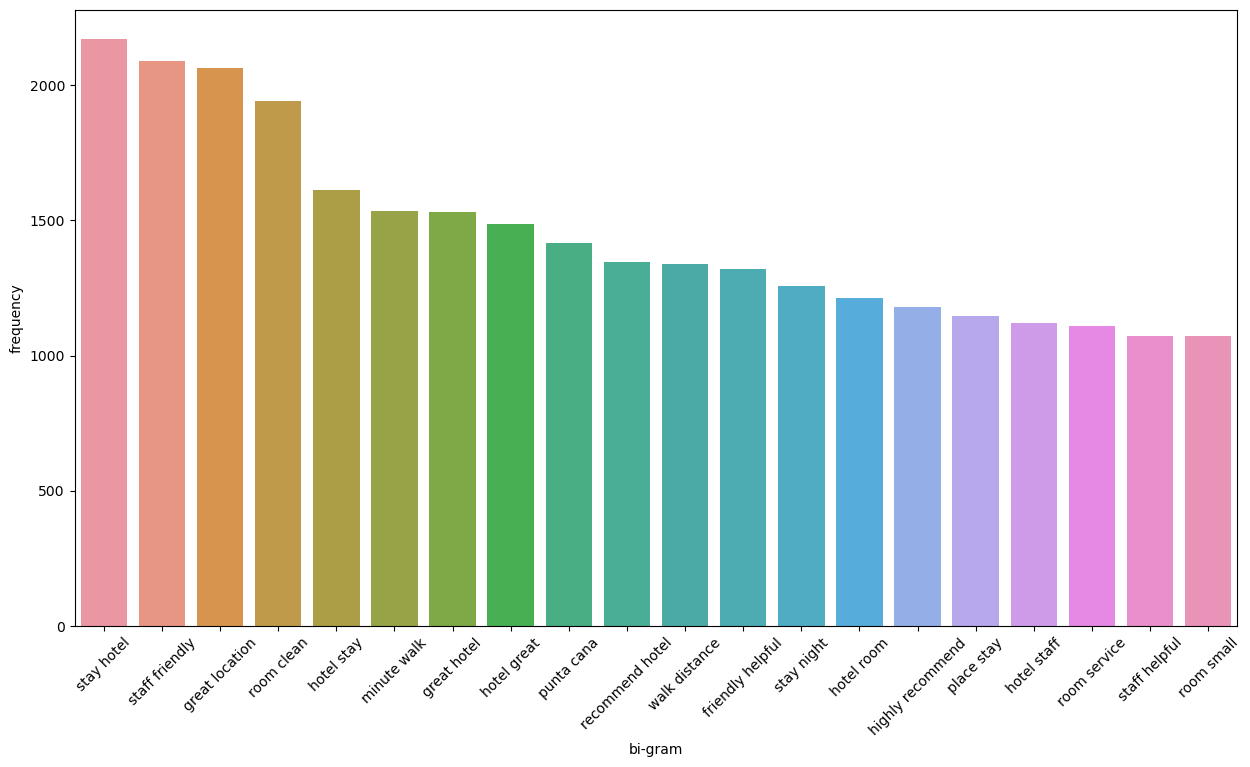

In [97]:
top_20_pos_bigram=get_top_n_words(df_pos['Lemmatized_Review'],n=20,ngram=(2,2))
top_20_pos_bigram=pd.DataFrame(top_20_pos_bigram,columns=['bi-gram','frequency'])
plt.figure(figsize=(15,8))
fig=sns.barplot(x='bi-gram',y='frequency',data=top_20_pos_bigram)
fig.set_xticklabels(rotation=45,labels=top_20_pos_bigram['bi-gram'])
plt.show()

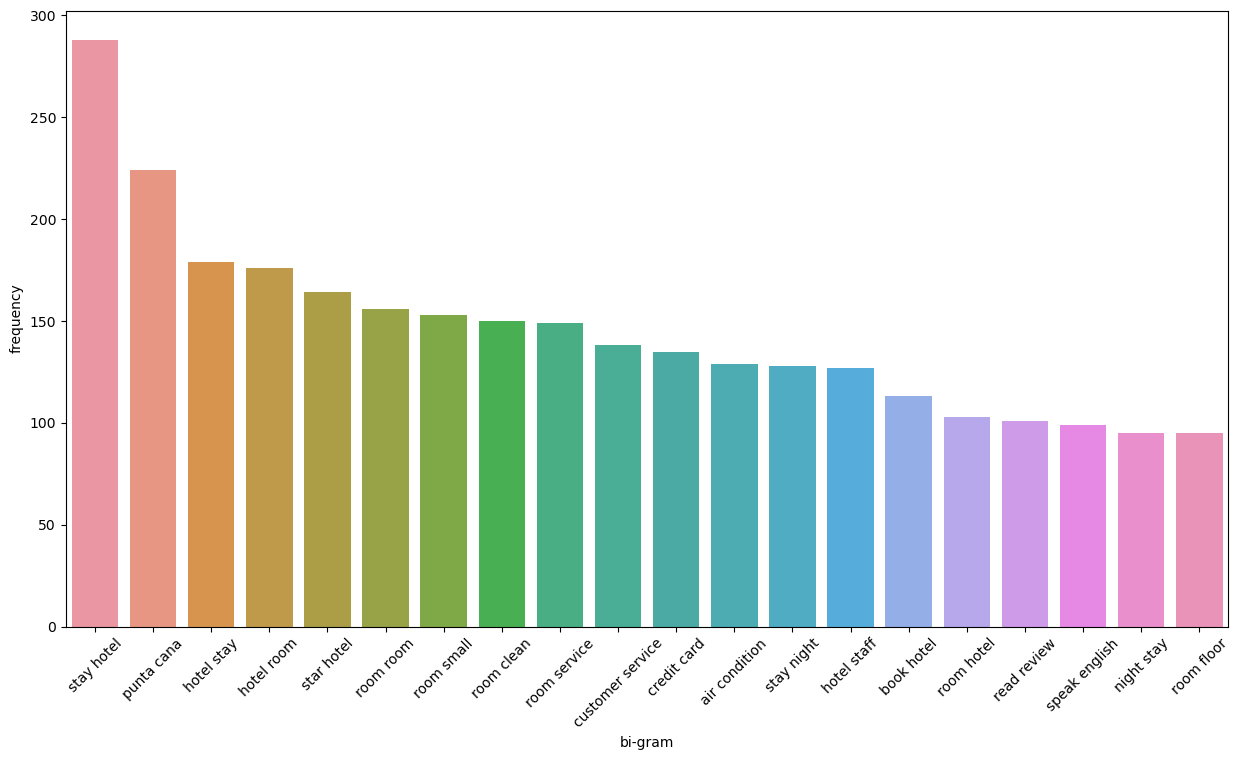

In [98]:
top_20_neg_bigram=get_top_n_words(df_neg['Lemmatized_Review'],n=20,ngram=(2,2))
top_20_neg_bigram=pd.DataFrame(top_20_neg_bigram,columns=['bi-gram','frequency'])
plt.figure(figsize=(15,8))
fig=sns.barplot(x='bi-gram',y='frequency',data=top_20_neg_bigram)
fig.set_xticklabels(rotation=45,labels=top_20_neg_bigram['bi-gram'])
plt.show()

**Tri Gram**

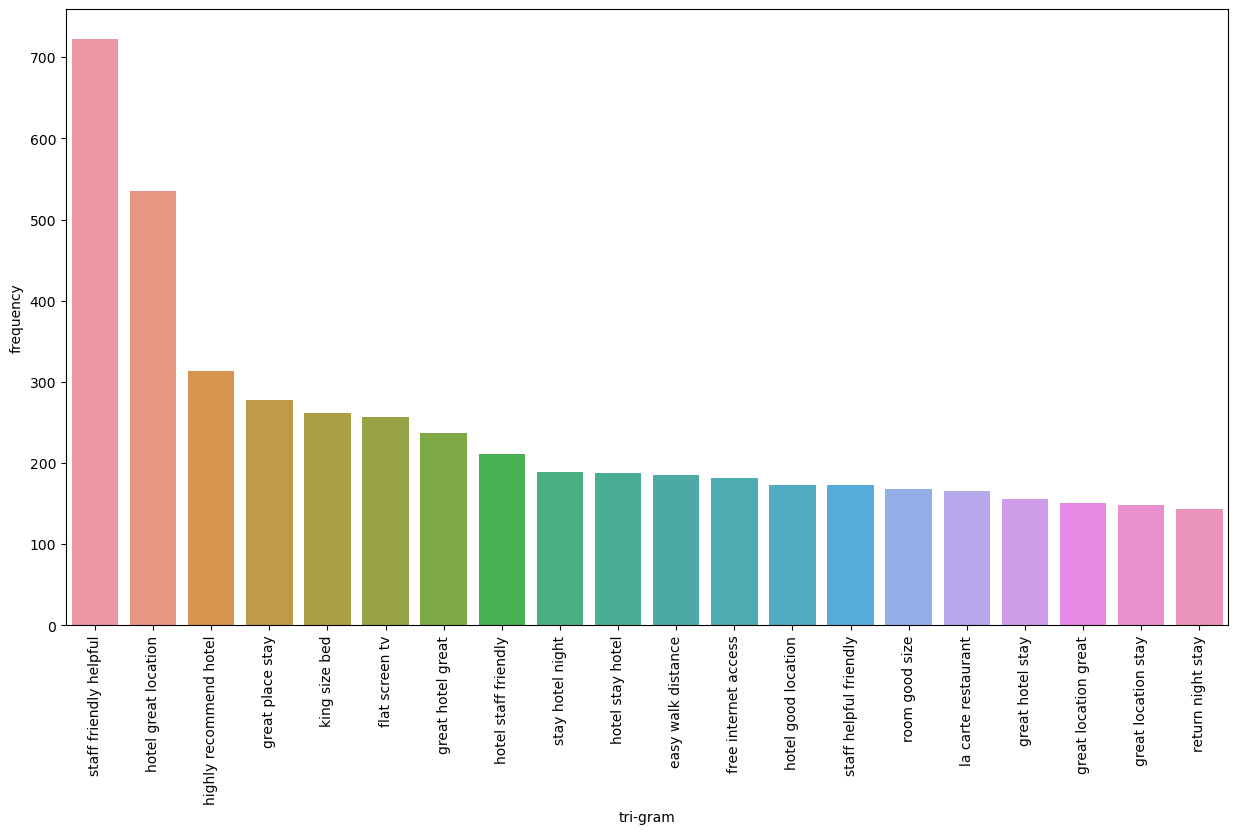

In [99]:
top_20_pos_trigram=get_top_n_words(df_pos['Lemmatized_Review'],n=20,ngram=(3,3))
top_20_pos_trigram=pd.DataFrame(top_20_pos_trigram,columns=['tri-gram','frequency'])
plt.figure(figsize=(15,8))
fig=sns.barplot(x='tri-gram',y='frequency',data=top_20_pos_trigram)
fig.set_xticklabels(rotation=90,labels=top_20_pos_trigram['tri-gram'])
plt.show()

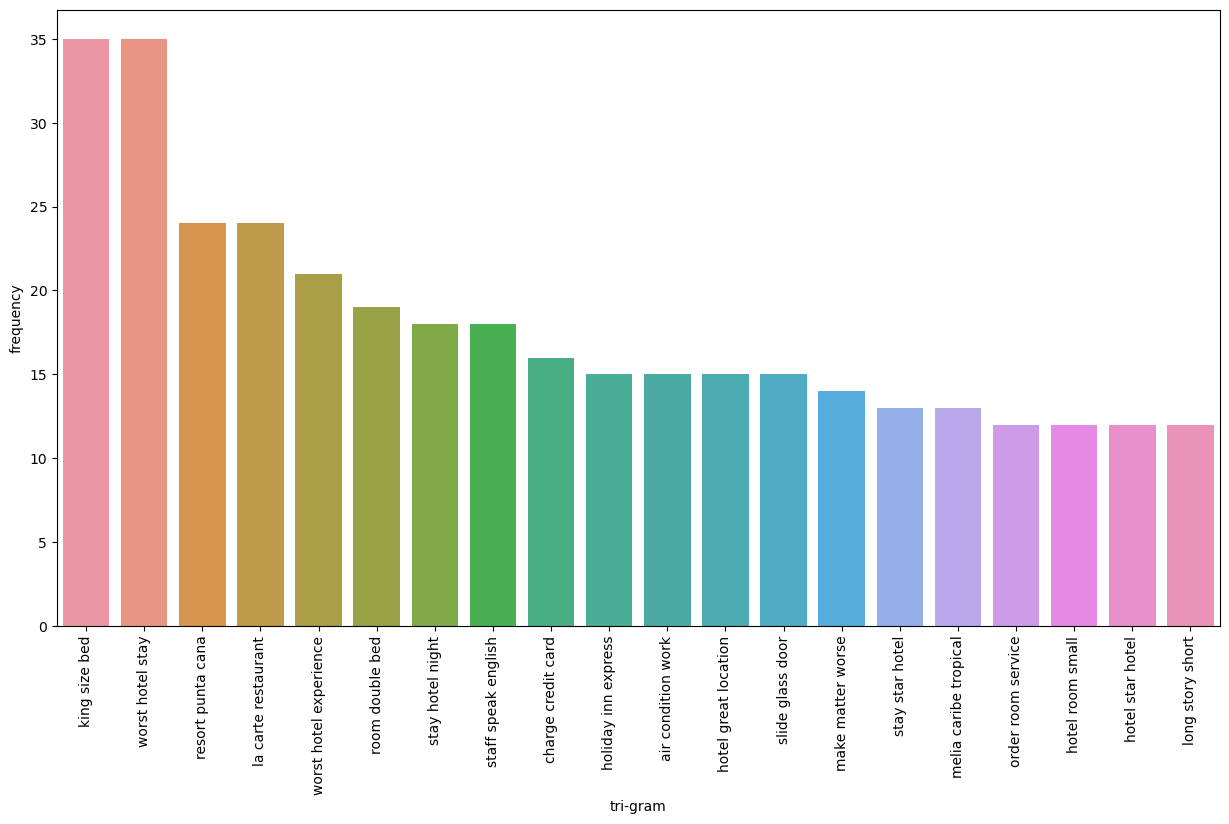

In [100]:
top_20_neg_trigram=get_top_n_words(df_neg['Lemmatized_Review'],n=20,ngram=(3,3))
top_20_neg_trigram=pd.DataFrame(top_20_neg_trigram,columns=['tri-gram','frequency'])
plt.figure(figsize=(15,8))
fig=sns.barplot(x='tri-gram',y='frequency',data=top_20_neg_trigram)
fig.set_xticklabels(rotation=90,labels=top_20_neg_trigram['tri-gram'])
plt.show()

**Word Cloud**

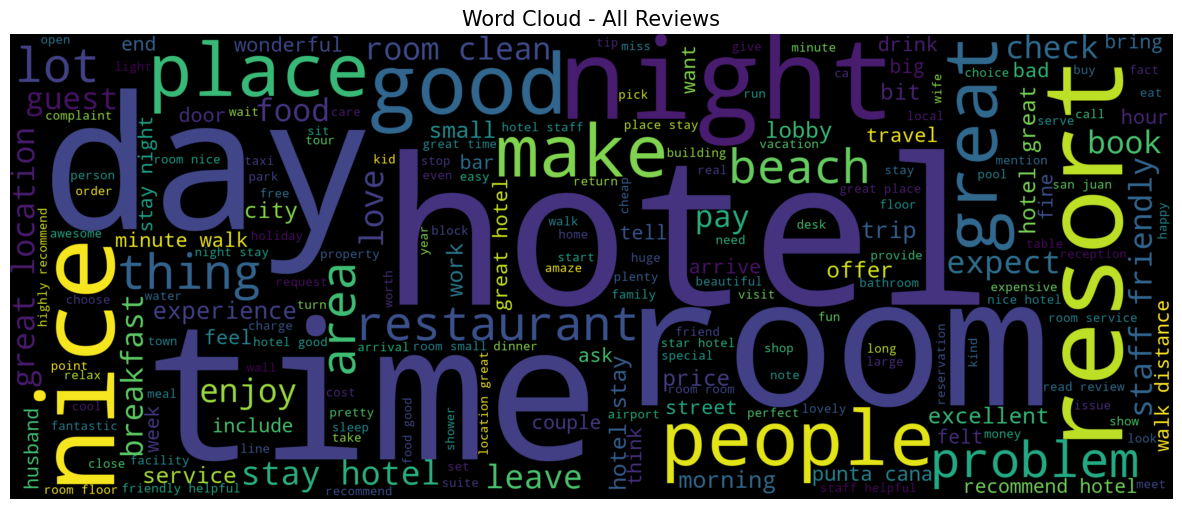

In [101]:
#From complete Reviews
string = " ".join(df['Lemmatized_Review'])
word_cloud = WordCloud(width=2500,height=1000).generate(string)
plt.figure(figsize=(15,15))
plt.imshow(word_cloud,interpolation='bilinear')
plt.title('Word Cloud - All Reviews',size=15)
plt.axis('off')
plt.show()

In [102]:
def positive_negative(txt):
  """
  This function takes text string as input and get only words that are having below pos tags
  ['JJ','JJR','JJS','NNP','NNPS','RB','RBR','RBS','VB','VBD','VBG','VBN','VBP','VBZ']
  """
  list_review=[wrd if tag in ['JJ','JJR','JJS','NNP','NNPS','RB','RBR','RBS','VB','VBD','VBG','VBN','VBP','VBZ'] else '' for wrd, tag in pos_tag(w_tokenizer.tokenize(txt))]
  return (' '.join([x for x in list_review if x]))

In [103]:
df['pos_tags_words'] = df['Lemmatized_Review'].apply(lambda x: positive_negative(x))
df.head()

,Review,Rating,Rating_Analysis,Cleaned_Review,Lemmatized_Review,subjectivity,polarity,sentiment_polarity,neg_senti_score,neu_senti_score,pos_senti_score,compound,Sentiment_Vader_Compound,sentiment_spacy_score,sentiment_spacy,no_chars,no_words,pos_tags_words
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking good deal stay ho...,nice hotel expensive parking good deal stay ho...,0.723158,0.229599,Positive,0.064,0.608,0.329,0.9769,Positive,5,Positive,484,73,nice expensive good stay anniversary arrive la...
1,ok nothing special charge diamond member hilto...,2,Negative,special charge diamond member hilton decided c...,special charge diamond member hilton decide ch...,0.534312,0.222302,Positive,0.049,0.735,0.216,0.9904,Positive,12,Positive,1410,205,special shot anniversary seattle suite extra w...
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.598765,0.341534,Positive,0.048,0.677,0.275,0.9937,Positive,10,Positive,1197,174,nice seattle good large comfortable pillowsatt...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.691228,0.504825,Positive,0.000,0.564,0.436,0.9940,Positive,14,Positive,523,80,unique great wonderful excellent short main fr...
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay seahawk game awesome dow...,great stay great stay seahawk game awesome dow...,0.696753,0.475649,Positive,0.078,0.623,0.299,0.9929,Positive,5,Positive,1007,155,great great seahawk awesome build huge helpful...


In [104]:
positive_wordcloud=df[df['sentiment_spacy']=='Positive']['pos_tags_words']
positive_wordcloud

0        nice expensive good stay anniversary arrive la...
1        special shot anniversary seattle suite extra w...
2        nice seattle good large comfortable pillowsatt...
3        unique great wonderful excellent short main fr...
4        great great seahawk awesome build huge helpful...
                               ...                        
20483    good clean happy even courteous bed comfortabl...
20486    secret stay beat stay esteem bw crowd leisure ...
20487    great great quick sightsdirectly street needle...
20488    nice modern friendly corridor dark good pulled...
20490    talk excellent patricia extremely helpful flue...
Name: pos_tags_words, Length: 17662, dtype: object

In [105]:
negative_wordcloud=df[df['sentiment_spacy']=='Negative']['pos_tags_words']
negative_wordcloud

15       horrible stay february pick website online inc...
32       noise airconditionera standard warwick seattle...
42       warwick bad good rude fairly dirty bandaid req...
44       austin familiar seattlewhere clean ask brought...
54       expensive simple simply unbeatable mere great ...
                               ...                        
20474    bad terrible noisy nearby hang greatest nice s...
20481    run average chose expensive roombed reserved u...
20484    deceptive deceptive completely true free seatt...
20485    impressed unfriendly check higher highest tell...
20489    ruin open guest happy stumble apt gobcn unexpe...
Name: pos_tags_words, Length: 2235, dtype: object

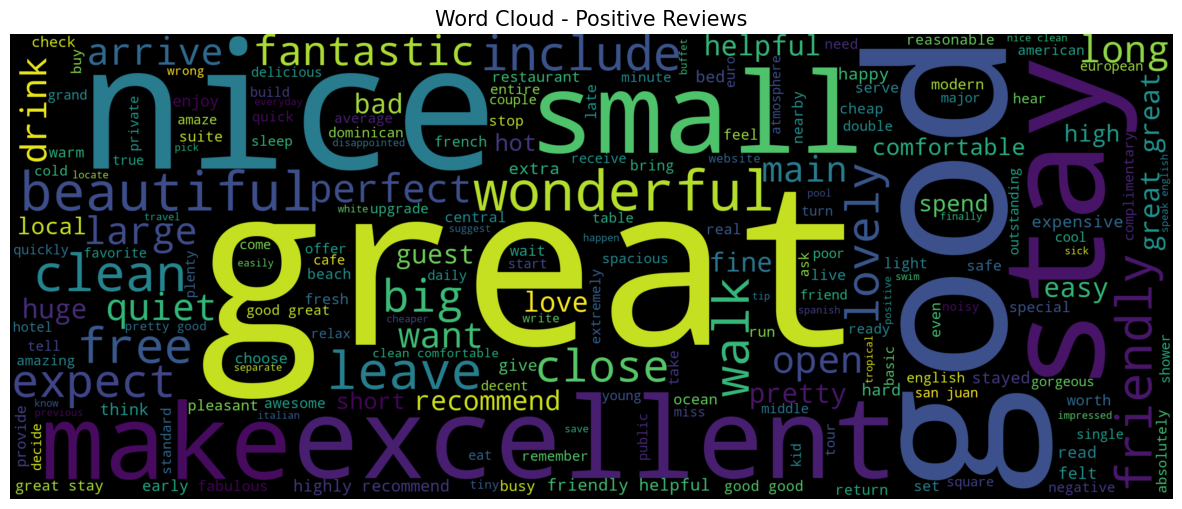

In [106]:
#From Positive Reviews
string = " ".join(positive_wordcloud)
word_cloud = WordCloud(width=2500,height=1000).generate(string)
plt.figure(figsize=(15,15))
plt.imshow(word_cloud,interpolation='bilinear')
plt.title('Word Cloud - Positive Reviews',size=15)
plt.axis('off')
plt.show()

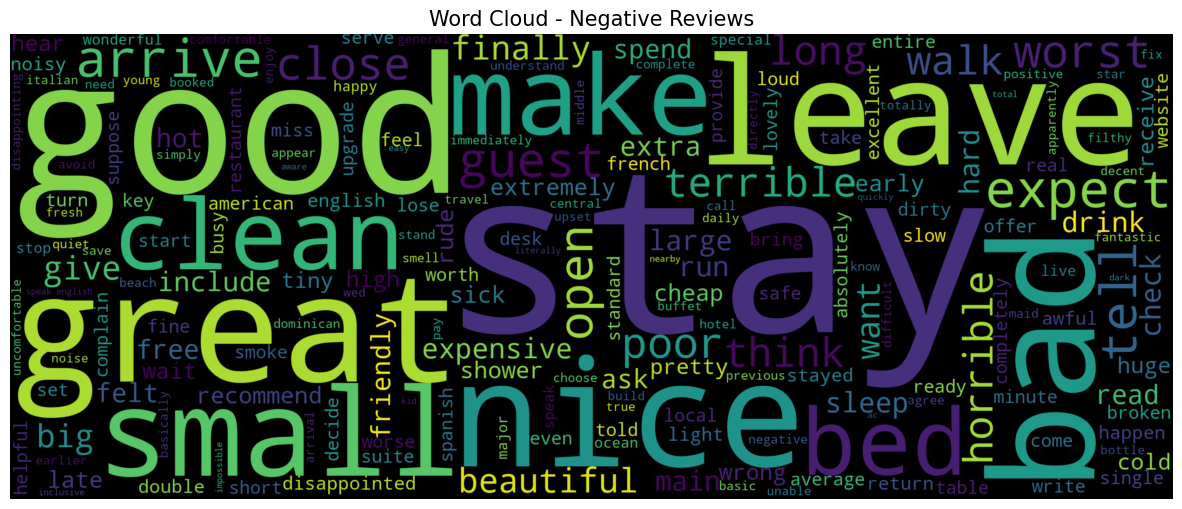

In [107]:
#From Negative Reviews
string = " ".join(negative_wordcloud)
word_cloud = WordCloud(width=2500,height=1000).generate(string)
plt.figure(figsize=(15,15))
plt.imshow(word_cloud,interpolation='bilinear')
plt.title('Word Cloud - Negative Reviews',size=15)
plt.axis('off')
plt.show()

## **Model Building**

In [108]:
!pip install scikeras[tensorflow]

In [221]:
#Import Required Python Libraries
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,confusion_matrix,f1_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.backend import clear_session
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Data Preparation

In [110]:
X=df['Lemmatized_Review']
y=df['Rating']

In [111]:
X.shape,y.shape

((20491,), (20491,))

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [113]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16392,), (4099,), (16392,), (4099,))

**TF - IDF Vectorization**

In [114]:
tf_idf = TfidfVectorizer(ngram_range=(1,2),max_features=10000)

In [115]:
x_train_sparse = tf_idf.fit_transform(X_train)
x_train_sparse.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [116]:
x_test_sparse = tf_idf.fit_transform(X_test)
x_test_sparse.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [117]:
x_train_df = pd.DataFrame(x_train_sparse.toarray(), columns=tf_idf.get_feature_names())
x_train_df.head()

,aa,aaa,abc,absolute,absolutely,absolutely amazing,absolutely beautiful,absolutely fabulous,absolutely fantastic,absolutely gorgeous,...,youçéêl,youçéö,yr,yuck,yum,yummy,yunque,zandbergen,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
list(x_train_df.columns)

['aa',
 'aaa',
 'abc',
 'absolute',
 'absolutely',
 'absolutely amazing',
 'absolutely beautiful',
 'absolutely fabulous',
 'absolutely fantastic',
 'absolutely gorgeous',
 'absolutely love',
 'absolutely perfect',
 'absolutely recommend',
 'absolutely stay',
 'absolutely wonderful',
 'absolutly',
 'abundant',
 'ac',
 'ac room',
 'ac work',
 'accept',
 'acceptable',
 'access',
 'access hotel',
 'access internet',
 'access lobby',
 'access room',
 'accessible',
 'accident',
 'accidentally',
 'accommodate',
 'accommodation',
 'accomodate',
 'accomodated',
 'accomodating',
 'accomodation',
 'accomodations',
 'accompany',
 'account',
 'accross',
 'accurate',
 'achieve',
 'acknowledge',
 'act',
 'action',
 'active',
 'activity',
 'activity day',
 'activity kid',
 'activity staff',
 'actual',
 'adagio',
 'adam',
 'add',
 'add bonus',
 'added',
 'addition',
 'additional',
 'additional charge',
 'additionally',
 'address',
 'adequate',
 'adjacent',
 'adjoin',
 'adjoin room',
 'adjust',
 'admit

In [119]:
x_test_df = pd.DataFrame(x_test_sparse.toarray(), columns=tf_idf.get_feature_names())
x_test_df.head()

,aa,aaa,abc,absolute,absolutely,absolutely amazing,absolutely beautiful,absolutely fabulous,absolutely fantastic,absolutely gorgeous,...,youçéêl,youçéö,yr,yuck,yum,yummy,yunque,zandbergen,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
x_train_df.shape,x_test_df.shape

((16392, 10000), (4099, 10000))

# Model Building / Model Evaluation / Model Testing

**1. Logistic Regression**

In [123]:
logistic_model = LogisticRegression()

In [124]:
logistic_model.fit(x_train_df,y_train)

LogisticRegression()

In [125]:
logistic_pred_train=logistic_model.predict(x_train_df)
logistic_pred_test=logistic_model.predict(x_test_df)
logistic_train_acc=accuracy_score(logistic_pred_train,y_train)
logistic_test_acc=accuracy_score(logistic_pred_test,y_test)

In [126]:
print(logistic_train_acc)
print(logistic_test_acc)

0.7969741337237677
0.4171749207123689


In [127]:
lo_train=pd.DataFrame.from_dict(classification_report(logistic_pred_train,y_train,output_dict=True))
print('\033[1m'+'\nLogistic Regression - Training Data\n')
lo_train.round(2)


Logistic Regression - Training Data



,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.84,0.71,0.50,0.74,0.92,0.8,0.74,0.82
recall,0.91,0.84,0.84,0.73,0.81,0.8,0.83,0.80
f1-score,0.87,0.77,0.63,0.74,0.86,0.8,0.77,0.80
support,1046.00,1212.00,1047.00,4880.00,8207.00,0.8,16392.00,16392.00


In [128]:
lo_test=pd.DataFrame.from_dict(classification_report(logistic_pred_test,y_test,output_dict=True))
print('\033[1m'+'\nLogistic Regression - Testing Data\n')
lo_test


Logistic Regression - Testing Data



,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.010563,0.011142,0.009153,0.115066,0.861403,0.417175,0.201466,0.752696
recall,0.068182,0.129032,0.222222,0.283096,0.443812,0.417175,0.229269,0.417175
f1-score,0.018293,0.020513,0.017582,0.163626,0.585805,0.417175,0.161164,0.522372
support,44.000000,31.000000,18.000000,491.000000,3515.000000,0.417175,4099.000000,4099.000000


In [129]:
lo_f1_tr=f1_score(logistic_pred_train,y_train,average='weighted').round(2)
lo_f1_tr

0.8

In [130]:
lo_f1_t=f1_score(logistic_pred_test,y_test,average='weighted').round(2)
lo_f1_t


0.52

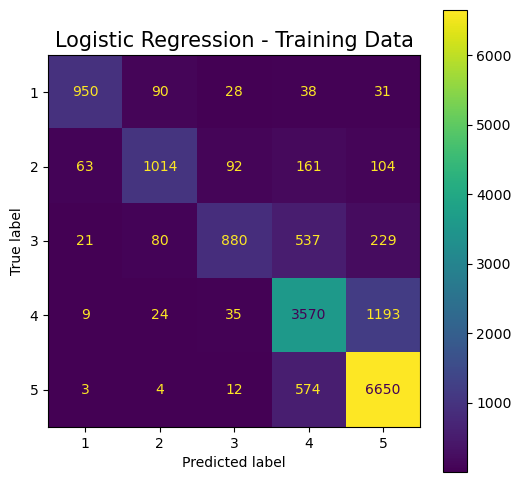

In [131]:
# Confusion Matrix for Training Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=logistic_model,X=x_train_df,y_true=y_train,ax=ax)
plt.title('Logistic Regression - Training Data',size=15)
plt.show()

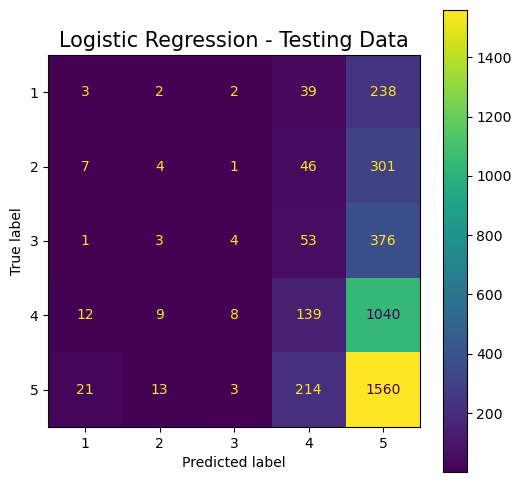

In [132]:
# Confusion Matrix for Testing Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=logistic_model,X=x_test_df,y_true=y_test,ax=ax)
plt.title('Logistic Regression - Testing Data',size=15)
plt.show()

**2. Decision Tree Algorithm**

In [133]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf=3)

In [134]:
dt_model.fit(x_train_df,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=3)

In [135]:
dt_pred_train=dt_model.predict(x_train_df)
dt_pred_test=dt_model.predict(x_test_df)
dt_train_acc=accuracy_score(dt_pred_train,y_train)
dt_test_acc=accuracy_score(dt_pred_test,y_test)

In [136]:
dt_train=pd.DataFrame.from_dict(classification_report(dt_pred_train,y_train,output_dict=True))
print('\033[1m'+'\nDecision Tree - Training Data\n')
dt_train.round(2)


Decision Tree - Training Data



,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.25,0.16,0.06,0.55,0.81,0.56,0.36,0.69
recall,0.78,0.52,0.68,0.49,0.58,0.56,0.61,0.56
f1-score,0.38,0.24,0.10,0.52,0.68,0.56,0.38,0.60
support,362.00,431.00,143.00,5365.00,10091.00,0.56,16392.00,16392.00


In [137]:
dt_test=pd.DataFrame.from_dict(classification_report(dt_pred_test,y_test,output_dict=True))
print('\033[1m'+'\nDecision Tree - Testing Data\n')
dt_test.round(2)


Decision Tree - Testing Data



,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.03,0.0,0.0,0.0,0.94,0.42,0.19,0.90
recall,0.04,0.0,0.0,0.2,0.44,0.42,0.14,0.42
f1-score,0.03,0.0,0.0,0.0,0.60,0.42,0.13,0.57
support,183.00,2.0,0.0,5.0,3909.00,0.42,4099.00,4099.00


In [138]:
dt_f1_tr=f1_score(dt_pred_train,y_train,average='weighted').round(2)
dt_f1_tr

0.6

In [139]:
dt_f1_t=f1_score(dt_pred_test,y_test,average='weighted').round(2)
dt_f1_t

0.57

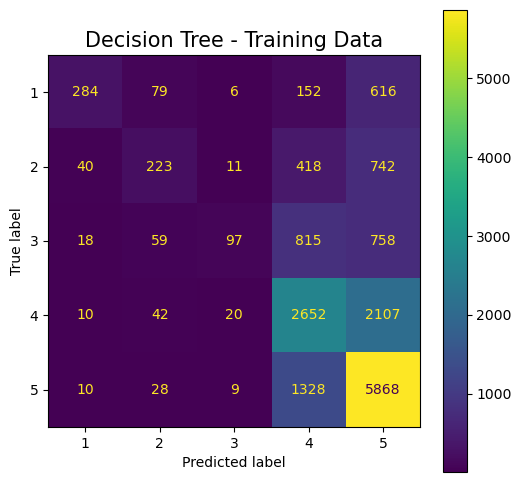

In [140]:
# Confusion Matrix for Training Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=dt_model,X=x_train_df,y_true=y_train,ax=ax)
plt.title('Decision Tree - Training Data',size=15)
plt.show()

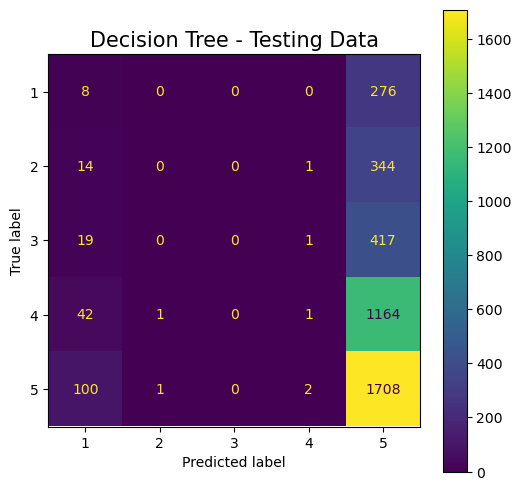

In [141]:
# Confusion Matrix for Testing Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=dt_model,X=x_test_df,y_true=y_test,ax=ax)
plt.title('Decision Tree - Testing Data',size=15)
plt.show()

**3. K- Nearest Neighbors Algorithm (KNN)**

In [142]:
knn_model = KNeighborsClassifier(n_neighbors=35)

In [143]:
knn_model.fit(x_train_df,y_train)

KNeighborsClassifier(n_neighbors=35)

In [144]:
knn_pred_train=knn_model.predict(x_train_df)
knn_pred_test=knn_model.predict(x_test_df)
knn_train_acc=accuracy_score(knn_pred_train,y_train)
knn_test_acc=accuracy_score(knn_pred_test,y_test)

In [145]:
knn_train=pd.DataFrame.from_dict(classification_report(knn_pred_train,y_train,output_dict=True))
print('\033[1m'+'\nKNN - Training Data\n')
knn_train.round(2)


KNN - Training Data



,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.46,0.16,0.06,0.44,0.86,0.56,0.40,0.69
recall,0.67,0.46,0.46,0.47,0.61,0.56,0.53,0.56
f1-score,0.54,0.23,0.10,0.45,0.71,0.56,0.41,0.61
support,774.00,486.00,219.00,4591.00,10322.00,0.56,16392.00,16392.00


In [146]:
knn_test=pd.DataFrame.from_dict(classification_report(knn_pred_test,y_test,output_dict=True))
print('\033[1m'+'\nKNN - Testing Data\n')
knn_test.round(2)


KNN - Testing Data



,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.01,0.01,0.00,0.14,0.85,0.42,0.20,0.74
recall,0.09,0.12,0.11,0.31,0.45,0.42,0.21,0.42
f1-score,0.02,0.02,0.01,0.19,0.58,0.42,0.17,0.52
support,46.00,25.00,18.00,549.00,3461.00,0.42,4099.00,4099.00


In [147]:
knn_f1_tr=f1_score(knn_pred_train,y_train,average='weighted').round(2)
knn_f1_tr

0.61

In [148]:
knn_f1_t=f1_score(knn_pred_test,y_test,average='weighted').round(2)
knn_f1_t

0.52

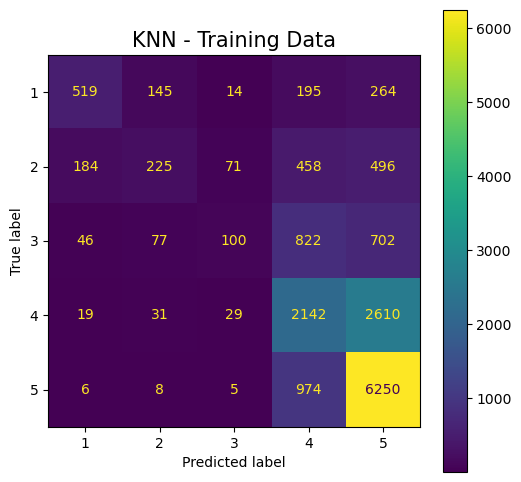

In [149]:
# Confusion Matrix for Training Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=knn_model,X=x_train_df,y_true=y_train,ax=ax)
plt.title('KNN - Training Data',size=15)
plt.show()

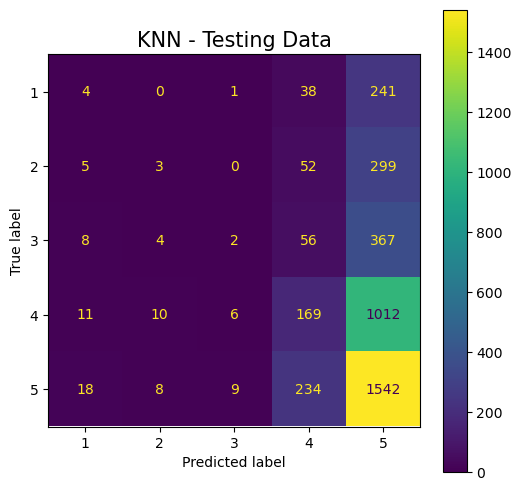

In [150]:
# Confusion Matrix for Testing Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=knn_model,X=x_test_df,y_true=y_test,ax=ax)
plt.title('KNN - Testing Data',size=15)
plt.show()

**4. Random Forest Classifier**

In [151]:
rf_model = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=9)

In [152]:
rf_model.fit(x_train_df,y_train)

RandomForestClassifier(max_depth=9)

In [153]:
rf_pred_train=rf_model.predict(x_train_df)
rf_pred_test=rf_model.predict(x_test_df)
rf_train_acc=accuracy_score(rf_pred_train,y_train)
rf_test_acc=accuracy_score(rf_pred_test,y_test)

In [154]:
rf_train=pd.DataFrame.from_dict(classification_report(rf_pred_train,y_train,output_dict=True))
print('\033[1m'+'\nRandom Forest - Training Data\n')
rf_train.round(2)


Random Forest - Training Data



,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.03,0.00,0.0,0.02,1.00,0.45,0.21,0.99
recall,1.00,1.00,1.0,0.78,0.45,0.45,0.85,0.45
f1-score,0.06,0.01,0.0,0.04,0.62,0.45,0.14,0.61
support,33.00,4.00,1.0,120.00,16234.00,0.45,16392.00,16392.00


In [155]:
rf_test=pd.DataFrame.from_dict(classification_report(rf_pred_test,y_test,output_dict=True))
print('\033[1m'+'\nRandom Forest - Testing Data\n')
rf_test.round(2)


Random Forest - Testing Data



,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.0,0.0,0.0,0.0,1.00,0.44,0.20,1.00
recall,0.0,0.0,0.0,0.0,0.44,0.44,0.09,0.44
f1-score,0.0,0.0,0.0,0.0,0.61,0.44,0.12,0.61
support,0.0,0.0,0.0,0.0,4099.00,0.44,4099.00,4099.00


In [156]:
rf_f1_tr=f1_score(rf_pred_train,y_train,average='weighted').round(2)
rf_f1_tr

0.61

In [157]:
rf_f1_t=f1_score(rf_pred_test,y_test,average='weighted').round(2)
rf_f1_t

0.61

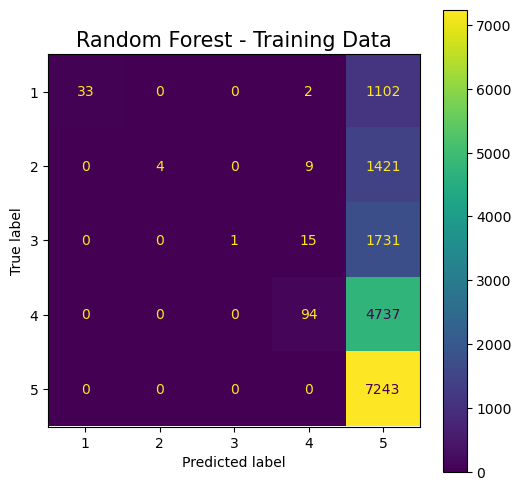

In [158]:
# Confusion Matrix for Training Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=rf_model,X=x_train_df,y_true=y_train,ax=ax)
plt.title('Random Forest - Training Data',size=15)
plt.show()

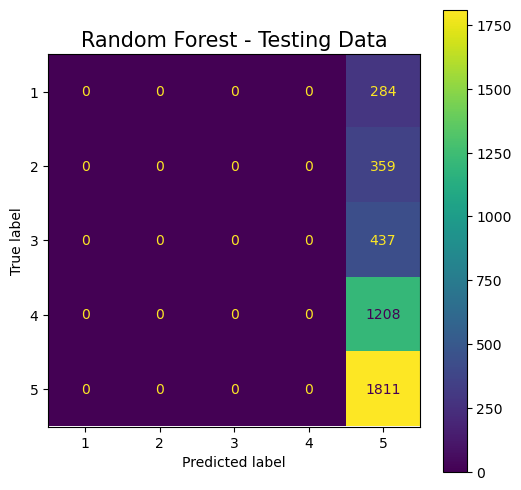

In [159]:
# Confusion Matrix for Testing Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=rf_model,X=x_test_df,y_true=y_test,ax=ax)
plt.title('Random Forest - Testing Data',size=15)
plt.show()

**5. Support Vector Machines**

In [160]:
svm_model = SVC()

In [161]:
svm_model.fit(x_train_df,y_train)


SVC()

In [162]:
svm_pred_train=svm_model.predict(x_train_df)
svm_pred_test=svm_model.predict(x_test_df)
svm_train_acc=accuracy_score(svm_pred_train,y_train)
svm_test_acc=accuracy_score(svm_pred_test,y_test)

In [163]:
svm_train=pd.DataFrame.from_dict(classification_report(svm_pred_train,y_train,output_dict=True))
print('\033[1m'+'\nSVM - Training Data\n')
svm_train.round(2)


SVM - Training Data



,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.99,0.96,0.90,0.94,0.99,0.96,0.95,0.96
recall,0.99,0.98,0.99,0.95,0.95,0.96,0.97,0.96
f1-score,0.99,0.97,0.94,0.94,0.97,0.96,0.96,0.96
support,1133.00,1404.00,1579.00,4781.00,7495.00,0.96,16392.00,16392.00


In [164]:
svm_test=pd.DataFrame.from_dict(classification_report(svm_pred_test,y_test,output_dict=True))
print('\033[1m'+'\nSVM - Testing Data\n')
svm_test.round(2)


SVM - Testing Data



,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.0,0.01,0.00,0.09,0.92,0.43,0.20,0.84
recall,0.0,0.09,0.25,0.32,0.45,0.43,0.22,0.43
f1-score,0.0,0.02,0.00,0.14,0.60,0.43,0.15,0.56
support,20.0,35.00,4.00,331.00,3709.00,0.43,4099.00,4099.00


In [165]:
svm_f1_tr=f1_score(svm_pred_train,y_train,average='weighted').round(2)
svm_f1_tr

0.96

In [166]:
svm_f1_t=f1_score(svm_pred_test,y_test,average='weighted').round(2)
svm_f1_t

0.56

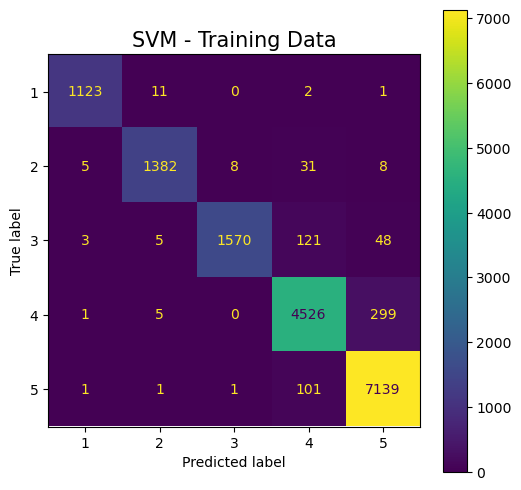

In [211]:
# Confusion Matrix for Training Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=svm_model,X=x_train_df,y_true=y_train,ax=ax)
plt.title('SVM - Training Data',size=15)
plt.show()

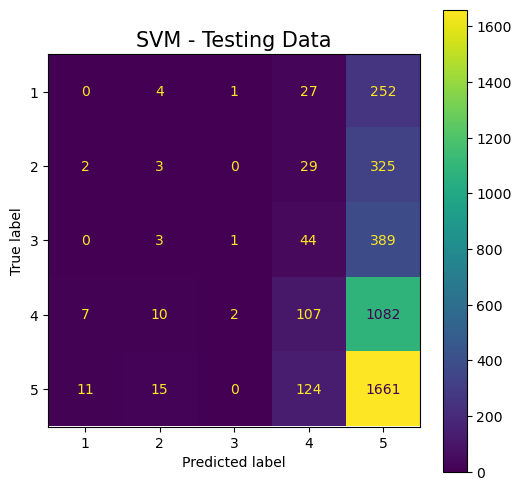

In [212]:
# Confusion Matrix for Testing Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=svm_model,X=x_test_df,y_true=y_test,ax=ax)
plt.title('SVM - Testing Data',size=15)
plt.show()

**6. XG Boosting**

In [169]:
xgb_model=XGBClassifier(n_estimators=100)

In [170]:
le=LabelEncoder()
le_y_train=le.fit_transform(y_train)
le_y_test=le.fit_transform(y_test)

In [171]:
xgb_model.fit(x_train_df,le_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [172]:
xgb_pred_train=xgb_model.predict(x_train_df)
xgb_pred_test=xgb_model.predict(x_test_df)
xgb_train_acc=accuracy_score(xgb_pred_train,le_y_train)
xgb_test_acc=accuracy_score(xgb_pred_test,le_y_test)

In [173]:
print(xgb_train_acc)
print(xgb_test_acc)

0.9130063445583211
0.3176384484020493


In [174]:
xgb_train=pd.DataFrame.from_dict(classification_report(xgb_pred_train,y_train,output_dict=True))
print('\033[1m'+'\nXG Boosting - Training Data\n')
xgb_train.round(2)


XG Boosting - Training Data



,0,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.0,0.0,0.0,0.09,0.16,0.0,0.06,0.04,0.10
recall,0.0,0.0,0.0,0.04,0.10,0.0,0.06,0.02,0.06
f1-score,0.0,0.0,0.0,0.05,0.12,0.0,0.06,0.03,0.07
support,1139.0,1366.0,1477.0,4487.00,7923.00,0.0,0.06,16392.00,16392.00


In [175]:
xgb_test=pd.DataFrame.from_dict(classification_report(xgb_pred_test,y_test,output_dict=True))
print('\033[1m'+'\nXG Boosting - Testing Data\n')
xgb_test.round(2)


XG Boosting - Testing Data



,0,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.0,0.04,0.01,0.01,0.59,0.0,0.18,0.11,0.37
recall,0.0,0.06,0.10,0.04,0.28,0.0,0.18,0.08,0.18
f1-score,0.0,0.04,0.01,0.01,0.38,0.0,0.18,0.07,0.24
support,1293.0,177.00,20.00,73.00,2536.00,0.0,0.18,4099.00,4099.00


In [176]:
xgb_f1_tr=f1_score(xgb_pred_train,le_y_train,average='weighted').round(2)
xgb_f1_tr

0.91

In [177]:
xgb_f1_t=f1_score(xgb_pred_test,le_y_test,average='weighted').round(2)
xgb_f1_t

0.37

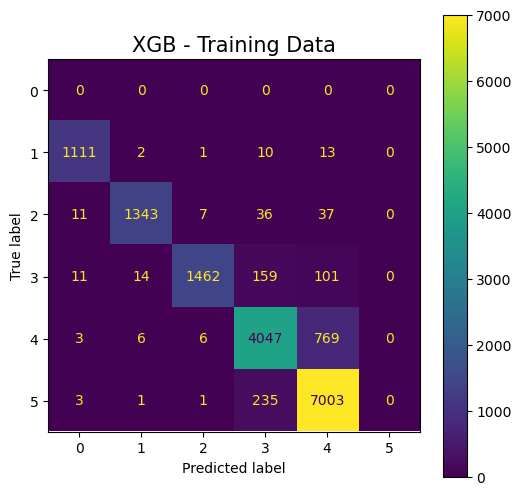

In [178]:
# Confusion Matrix for Training Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=xgb_model,X=x_train_df,y_true=y_train,ax=ax)
plt.title('XGB - Training Data',size=15)
plt.show()

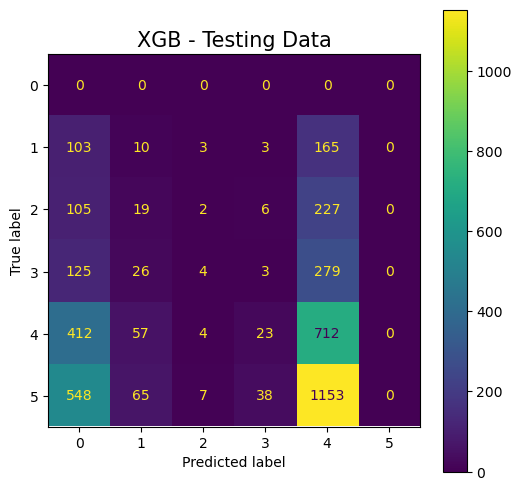

In [179]:
# Confusion Matrix for Testing Dataset
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(estimator=xgb_model,X=x_test_df,y_true=y_test,ax=ax)
plt.title('XGB - Testing Data',size=15)
plt.show()

**7. Neural Network**

In [180]:
input_dim = x_train_df.shape[1]
input_dim

10000

In [181]:
y_train_encoded=pd.get_dummies(y_train).to_numpy()
y_test_encoded=pd.get_dummies(y_test).to_numpy()

In [182]:
y_train_encoded

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [183]:
model1=Sequential()
model1.add(Dense(units=64,input_dim=input_dim,activation='relu'))
model1.add(Dense(units=32,activation='relu'))
model1.add(Dense(units=5,activation='softmax'))
adam=Adam(learning_rate=0.01)

In [184]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 642,309
Trainable params: 642,309
Non-trainable params: 0
_________________________________________________________________


In [185]:
model1.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=adam)

In [186]:
#clear_session()
model_history1=model1.fit(x_train_df,y_train_encoded,validation_split=0.3,batch_size=75,epochs=100,verbose=2)

Epoch 1/100
153/153 - 2s - loss: 0.9824 - accuracy: 0.5687 - val_loss: 0.8529 - val_accuracy: 0.6253 - 2s/epoch - 14ms/step
Epoch 2/100
153/153 - 1s - loss: 0.5596 - accuracy: 0.7699 - val_loss: 0.9747 - val_accuracy: 0.5838 - 1s/epoch - 9ms/step
Epoch 3/100
153/153 - 1s - loss: 0.2079 - accuracy: 0.9271 - val_loss: 1.5676 - val_accuracy: 0.5834 - 1s/epoch - 9ms/step
Epoch 4/100
153/153 - 1s - loss: 0.0486 - accuracy: 0.9864 - val_loss: 2.1101 - val_accuracy: 0.5876 - 1s/epoch - 9ms/step
Epoch 5/100
153/153 - 1s - loss: 0.0094 - accuracy: 0.9977 - val_loss: 2.7221 - val_accuracy: 0.5819 - 1s/epoch - 9ms/step
Epoch 6/100
153/153 - 1s - loss: 0.0016 - accuracy: 0.9998 - val_loss: 3.0498 - val_accuracy: 0.5852 - 1s/epoch - 9ms/step
Epoch 7/100
153/153 - 1s - loss: 4.1313e-04 - accuracy: 0.9999 - val_loss: 3.3204 - val_accuracy: 0.5793 - 1s/epoch - 8ms/step
Epoch 8/100
153/153 - 1s - loss: 2.4174e-04 - accuracy: 0.9999 - val_loss: 3.4967 - val_accuracy: 0.5789 - 1s/epoch - 8ms/step
Epoch 9

Epoch 66/100
153/153 - 1s - loss: 8.3012e-08 - accuracy: 1.0000 - val_loss: 6.0818 - val_accuracy: 0.5769 - 1s/epoch - 8ms/step
Epoch 67/100
153/153 - 1s - loss: 7.6311e-08 - accuracy: 1.0000 - val_loss: 6.1111 - val_accuracy: 0.5756 - 1s/epoch - 8ms/step
Epoch 68/100
153/153 - 1s - loss: 7.0534e-08 - accuracy: 1.0000 - val_loss: 6.1405 - val_accuracy: 0.5756 - 1s/epoch - 8ms/step
Epoch 69/100
153/153 - 1s - loss: 6.4862e-08 - accuracy: 1.0000 - val_loss: 6.1880 - val_accuracy: 0.5765 - 1s/epoch - 8ms/step
Epoch 70/100
153/153 - 1s - loss: 5.9885e-08 - accuracy: 1.0000 - val_loss: 6.2126 - val_accuracy: 0.5758 - 1s/epoch - 8ms/step
Epoch 71/100
153/153 - 1s - loss: 5.4773e-08 - accuracy: 1.0000 - val_loss: 6.2356 - val_accuracy: 0.5752 - 1s/epoch - 8ms/step
Epoch 72/100
153/153 - 1s - loss: 5.0212e-08 - accuracy: 1.0000 - val_loss: 6.2639 - val_accuracy: 0.5754 - 1s/epoch - 8ms/step
Epoch 73/100
153/153 - 1s - loss: 4.6451e-08 - accuracy: 1.0000 - val_loss: 6.2914 - val_accuracy: 0.575

In [187]:
model_history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [188]:
y_test_encoded

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [189]:
y_pred_test=model1.predict(x_test_df)
y_pred_test

129/129 [==============================] - 0s 2ms/step


array([[1.1817285e-20, 1.7967189e-19, 2.3698577e-25, 9.4666272e-14,
        1.0000000e+00],
       [7.3712647e-11, 1.4777488e-08, 1.9364007e-16, 1.9125595e-13,
        1.0000000e+00],
       [2.5946959e-12, 1.5431403e-09, 4.8501850e-08, 4.7016445e-07,
        9.9999952e-01],
       ...,
       [7.6504839e-19, 6.8433945e-20, 1.2525206e-24, 1.0367292e-17,
        1.0000000e+00],
       [8.8266715e-06, 9.6198308e-01, 3.3833068e-08, 7.2556650e-06,
        3.8000859e-02],
       [2.3117117e-18, 2.1494253e-17, 1.5036572e-18, 5.1163229e-09,
        1.0000000e+00]], dtype=float32)

In [190]:
y_train_encoded

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [191]:
y_pred_train=model1.predict(x_train_df)
y_pred_train

513/513 [==============================] - 1s 2ms/step


array([[1.6000955e-28, 4.6042991e-27, 2.3222314e-24, 1.4733419e-11,
        1.0000000e+00],
       [2.9976020e-15, 1.5882839e-15, 6.5613380e-16, 1.0000000e+00,
        5.7931721e-14],
       [2.3460072e-22, 1.0659099e-20, 2.4928064e-17, 1.7516502e-15,
        1.0000000e+00],
       ...,
       [7.2403789e-05, 5.6194550e-01, 4.3676707e-01, 1.1883057e-03,
        2.6673741e-05],
       [1.3602880e-09, 2.4609508e-06, 8.0288982e-01, 1.9710773e-01,
        3.5332839e-08],
       [1.6957951e-11, 2.5699248e-07, 9.9998772e-01, 1.7090003e-06,
        1.0373508e-05]], dtype=float32)

In [192]:
y_tr=np.argmax(y_train_encoded, axis=1)+1
y_pred_tr=np.argmax(y_pred_train, axis=1)+1
y_t=np.argmax(y_test_encoded, axis=1)+1
y_pred_t=np.argmax(y_pred_test, axis=1)+1

In [193]:
train_predictions=pd.DataFrame()
train_predictions['Actual']=pd.Series(y_tr)
train_predictions['Test_Probability']=pd.Series(y_pred_tr)
train_predictions['Prediction']=train_predictions['Actual']-train_predictions['Test_Probability']
train_predictions['Validation']=train_predictions['Prediction'].apply(lambda x: True if x==0 else False)
train_predictions

,Actual,Test_Probability,Prediction,Validation
0,5,5,0,True
1,4,4,0,True
2,5,5,0,True
3,5,5,0,True
4,2,2,0,True
...,...,...,...,...
16387,4,5,-1,False
16388,4,2,2,False
16389,2,2,0,True
16390,3,3,0,True


In [194]:
train_predictions['Validation'].value_counts()


True     14293
False     2099
Name: Validation, dtype: int64

In [195]:
cnn_train=pd.DataFrame.from_dict(classification_report(train_predictions['Test_Probability'],train_predictions['Actual'],output_dict=True))
print('\033[1m'+'\nNeural Network - Training Data\n')
cnn_train.round(2)


Neural Network - Training Data



,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.86,0.84,0.81,0.85,0.91,0.87,0.85,0.87
recall,0.92,0.80,0.80,0.85,0.92,0.87,0.86,0.87
f1-score,0.89,0.82,0.80,0.85,0.91,0.87,0.85,0.87
support,1057.00,1517.00,1781.00,4836.00,7201.00,0.87,16392.00,16392.00


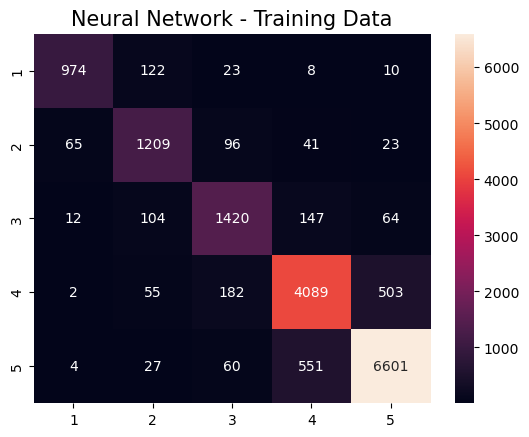

In [196]:
sns.heatmap(confusion_matrix(train_predictions['Actual'],train_predictions['Test_Probability']),annot=True,fmt='.0f',
            xticklabels=[1,2,3,4,5],yticklabels=[1,2,3,4,5])
plt.title('Neural Network - Training Data',size=15)
plt.show()

In [197]:
cnn_train_acc=accuracy_score(train_predictions['Test_Probability'],train_predictions['Actual'])
cnn_train_acc.round(3)

0.872

In [200]:
test_predictions=pd.DataFrame()
test_predictions['Actual']=pd.Series(y_t)
test_predictions['Test_Probability']=pd.Series(y_pred_t)
test_predictions['Prediction']=test_predictions['Actual']-test_predictions['Test_Probability']
test_predictions['Validation']=test_predictions['Prediction'].apply(lambda x: True if x==0 else False)

In [201]:
test_predictions['Validation'].value_counts()

False    2476
True     1623
Name: Validation, dtype: int64

In [202]:
cnn_test=pd.DataFrame.from_dict(classification_report(test_predictions['Test_Probability'],test_predictions['Actual'],output_dict=True))
print('\033[1m'+'\nNeural Network - Testing Data\n')
cnn_test.round(2)


Neural Network - Testing Data



,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.02,0.06,0.03,0.18,0.75,0.4,0.21,0.60
recall,0.16,0.15,0.19,0.28,0.44,0.4,0.25,0.40
f1-score,0.04,0.08,0.06,0.22,0.56,0.4,0.19,0.46
support,37.00,137.00,80.00,765.00,3080.00,0.4,4099.00,4099.00


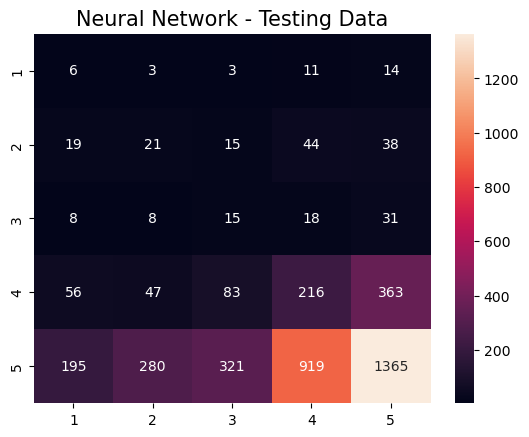

In [203]:
sns.heatmap(confusion_matrix(test_predictions['Test_Probability'],test_predictions['Actual']),annot=True,fmt='.0f',
            xticklabels=[1,2,3,4,5],yticklabels=[1,2,3,4,5])
plt.title('Neural Network - Testing Data',size=15)
plt.show()

In [204]:
cnn_test_acc=accuracy_score(test_predictions['Test_Probability'],test_predictions['Actual'])
cnn_test_acc.round(3)

0.396

In [205]:
cnn_f1_tr=f1_score(train_predictions['Test_Probability'],train_predictions['Actual'],average='weighted').round(2)
cnn_f1_tr

0.87

In [206]:
cnn_f1_t=f1_score(test_predictions['Test_Probability'],test_predictions['Actual'],average='weighted').round(2)
cnn_f1_t

0.46

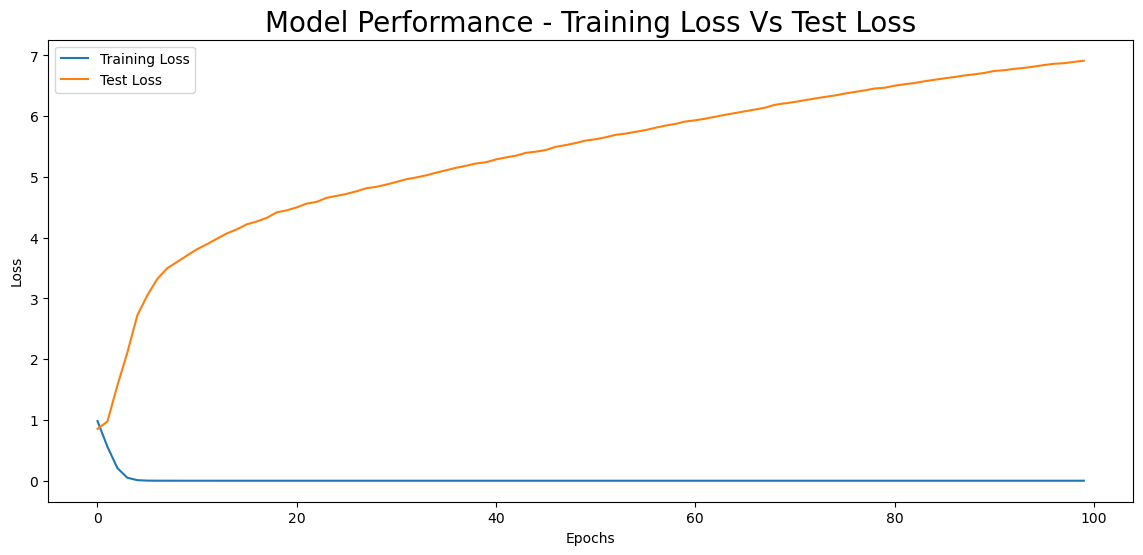

In [207]:
plt.figure(figsize=(14,6))
plt.plot(model_history1.history['loss'],label = 'Training Loss')
plt.plot(model_history1.history['val_loss'],label = 'Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Performance - Training Loss Vs Test Loss',size = 20)
plt.legend()
plt.show()

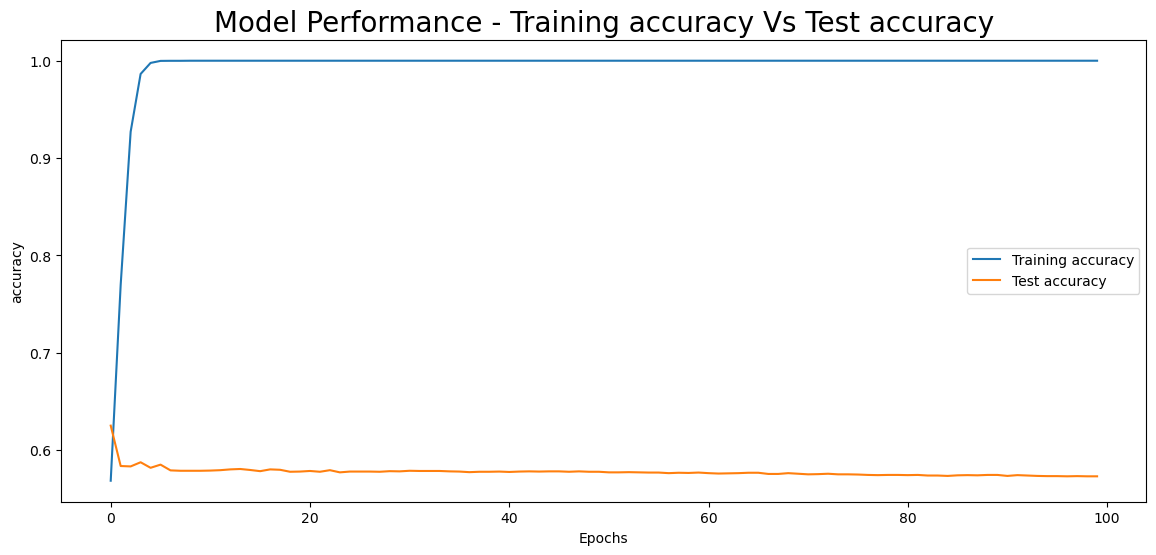

In [208]:
plt.figure(figsize=(14,6))
plt.plot(model_history1.history['accuracy'],label = 'Training accuracy')
plt.plot(model_history1.history['val_accuracy'],label = 'Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Model Performance - Training accuracy Vs Test accuracy',size = 20)
plt.legend()
plt.show()

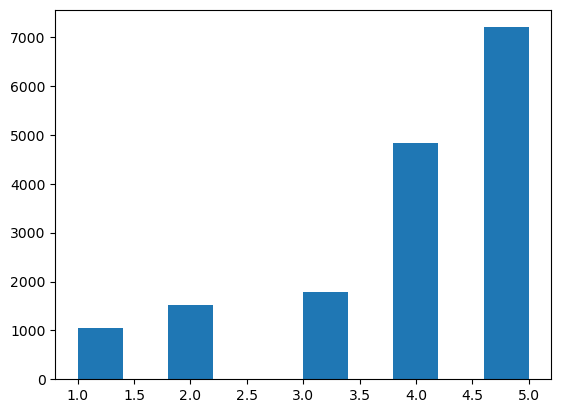

In [209]:
plt.hist(train_predictions['Test_Probability'])
plt.show()

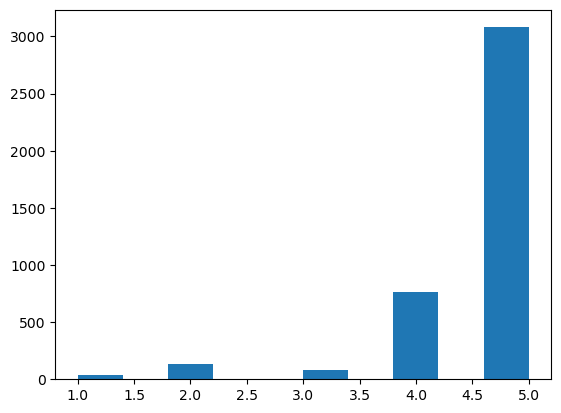

In [210]:
plt.hist(test_predictions['Test_Probability'])
plt.show()

# Model Evaluation

In [218]:
df_Model_analysis = pd.DataFrame(columns=['Training Accuracy','Testing Accuracy','Accuracy Difference'])
df_Model_analysis['Model Name'] = pd.Series(['Logistic Regression','Decision Tree','KNN','Random Forest',
                                             'SVM','XG Boost','Neural Network'])
df_Model_analysis['Training Accuracy'] = pd.Series([logistic_train_acc,dt_train_acc,knn_train_acc,rf_train_acc,
                                         svm_train_acc,xgb_train_acc,cnn_train_acc])
df_Model_analysis['Testing Accuracy'] = pd.Series([logistic_test_acc,dt_test_acc,knn_test_acc,rf_test_acc,
                                         svm_test_acc,xgb_test_acc,cnn_test_acc])
df_Model_analysis['Accuracy Difference'] = df_Model_analysis['Training Accuracy'] - df_Model_analysis['Testing Accuracy']
df_Model_analysis=df_Model_analysis.set_index('Model Name')
df_Model_analysis=df_Model_analysis.sort_values(by=['Training Accuracy','Testing Accuracy'],ascending = [True, True])
print('\033[1m'+'Accuracy Analysis - 10000 Features\n')
df_Model_analysis.round(3)


Accuracy Analysis - 10000 Features



,Training Accuracy,Testing Accuracy,Accuracy Difference
Model Name,,,
Random Forest,0.450,0.442,0.008
Decision Tree,0.557,0.419,0.138
KNN,0.563,0.420,0.144
Logistic Regression,0.797,0.417,0.380
Neural Network,0.872,0.396,0.476
XG Boost,0.913,0.318,0.595
SVM,0.960,0.432,0.528


In [220]:
df_f1_analysis = pd.DataFrame(columns=['Training F1 Score','Testing F1 Score','F1 Score Difference'])
df_f1_analysis['Model Name'] = pd.Series(['Logistic Regression','Decision Tree','KNN','Random Forest',
                                             'SVM','XG Boost' ,'Neural Network'])
df_f1_analysis['Training F1 Score'] = pd.Series([lo_f1_tr,dt_f1_tr,knn_f1_tr,rf_f1_tr,
                                                    svm_f1_tr,xgb_f1_tr,cnn_f1_tr])
df_f1_analysis['Testing F1 Score'] = pd.Series([lo_f1_t,dt_f1_t,knn_f1_t,rf_f1_t,
                                                    svm_f1_t,xgb_f1_t,cnn_f1_t])
                                                    
df_f1_analysis['F1 Score Difference'] = df_f1_analysis['Training F1 Score'] - df_f1_analysis['Testing F1 Score']
df_f1_analysis=df_f1_analysis.set_index('Model Name')
df_f1_analysis=df_f1_analysis.sort_values(by=['Training F1 Score','Testing F1 Score'],ascending = [True, True])
print('\033[1m'+'\nF1 Score Analysis - 10000 Features\n')
df_f1_analysis.round(3)



F1 Score Analysis - 10000 Features



,Training F1 Score,Testing F1 Score,F1 Score Difference
Model Name,,,
Decision Tree,0.60,0.57,0.03
KNN,0.61,0.52,0.09
Random Forest,0.61,0.61,0.00
Logistic Regression,0.80,0.52,0.28
Neural Network,0.87,0.46,0.41
XG Boost,0.91,0.37,0.54
SVM,0.96,0.56,0.40


**Algorithm selected = Support Vector Machine(SVM)**

In [223]:
df.to_csv("Processed_Final_Hotel_review.csv")
print("Done!!!!!")

Done!!!!!


# END